In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
FOLDER_PATH = '/Users/artemzmailov/Desktop/Chemical_Industry_Project/'
data = pd.read_csv(FOLDER_PATH + 'total_data_for_analysis.csv', index_col = 0)
data_companies = pd.read_csv(FOLDER_PATH + 'data_companies.csv', index_col = 0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2061 entries, 0 to 2060
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Компания                2061 non-null   object 
 1   Категория               2061 non-null   object 
 2   Название товара         2061 non-null   object 
 3   Цена                    2061 non-null   float64
 4   Цена за единицу объема  2061 non-null   float64
 5   Скидочная Цена          2061 non-null   float64
 6   Процент скидки          2061 non-null   float64
 7   Объем                   2061 non-null   float64
 8   Единицы Измерения       2061 non-null   object 
 9   Цена_Q3_2025            2061 non-null   int64  
 10  Цена_Q2_2025            2061 non-null   int64  
 11  Цена_Q1_2025            2061 non-null   int64  
 12  Цена_Q4_2024            2061 non-null   int64  
 13  Цена_Q3_2024            2061 non-null   int64  
 14  Цена_Q2_2024            2061 non-null   int64

In [3]:
# Индексы взяты от раздела "Производство химических веществ и химических продуктов" с Росстата 
monthly_indexes = {
    # 2024-2025 (октябрь 2024 → октябрь 2025)
    '2025-01': 103.01, '2025-02': 101.60, '2025-03': 102.41, '2025-04': 99.23,
    '2025-05': 97.14, '2025-06': 95.80, '2025-07': 101.33, '2025-08': 96.05,
    '2025-09': 101.42, '2025-10': 101.04,
    
    # 2023-2024 
    '2024-01': 98.64, '2024-02': 98.61, '2024-03': 102.22, '2024-04': 101.75,
    '2024-05': 101.00, '2024-06': 99.54, '2024-07': 99.94, '2024-08': 100.65,
    '2024-09': 101.13, '2024-10': 100.62, '2024-11': 100.18, '2024-12': 100.76,
    
    # 2022-2023
    '2023-01': 100.56, '2023-02': 100.48, '2023-03': 99.73, '2023-04': 100.94,
    '2023-05': 101.78, '2023-06': 97.88, '2023-07': 100.09, '2023-08': 102.32,
    '2023-09': 103.45, '2023-10': 101.96, '2023-11': 100.74, '2023-12': 97.93,
    
    # 2021-2022
    '2022-01': 104.83, '2022-02': 100.84, '2022-03': 103.97, '2022-04': 105.57,
    '2022-05': 102.56, '2022-06': 95.42, '2022-07': 92.71, '2022-08': 94.53,
    '2022-09': 93.91, '2022-10': 97.07, '2022-11': 97.90, '2022-12': 98.68,
    
    # 2020-2021
    '2021-01': 103.47, '2021-02': 104.48, '2021-03': 105.45, '2021-04': 107.53,
    '2021-05': 106.88, '2021-06': 102.09, '2021-07': 101.06, '2021-08': 101.62,
    '2021-09': 100.86, '2021-10': 101.74, '2021-11': 104.25, '2021-12': 102.90
}

monthly_indexes_pd = pd.DataFrame.from_dict(monthly_indexes, orient = 'index').sort_index() 
monthly_price_growth_pd = (monthly_indexes_pd[0]/100).cumprod()

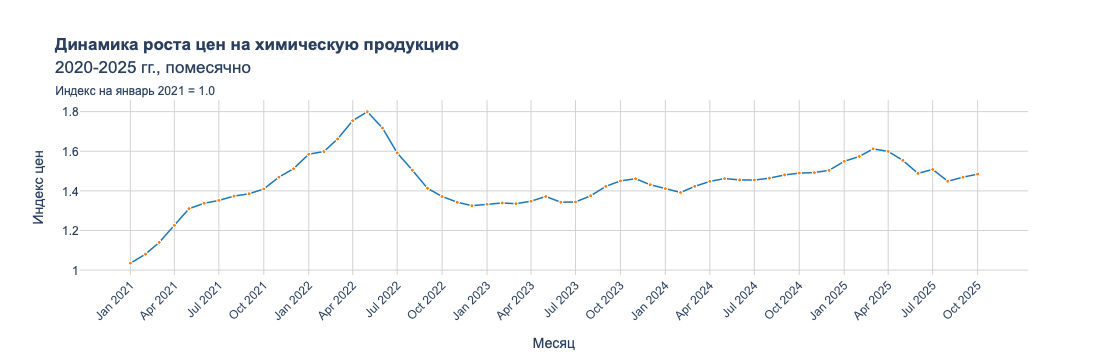

In [4]:
chemical_prices_growth_2020_2025_by_month_plot = px.line(
    x=monthly_price_growth_pd.index, 
    y=monthly_price_growth_pd,
    title='<b>Динамика роста цен на химическую продукцию</b><br>2020-2025 гг., помесячно</b><br><span style="font-size: 12px;">Индекс на январь 2021 = 1.0</span>',
    #title='<b>Динамика роста цен на химическую продукцию</b><br><span style="font-size: 12px;">Индекс на декабрь 2020 = 1.0</span>'
    labels={'x': 'Период', 'y': 'Индекс цен (база = 1)'},
    color_discrete_sequence=['#1f77b4']
)

chemical_prices_growth_2020_2025_by_month_plot.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(family='Arial', size=12),
    xaxis=dict(
        showgrid=True, 
        gridwidth=1, 
        gridcolor='lightgray',
        tickangle=-45,
        title='Месяц',
        #dtick='M3',  # показывать каждые 3 месяца для читаемости
        tickmode='array',  # явно задать деления
        tickvals=monthly_price_growth_pd.index[::3],  # каждые 3 месяца
        tickformat='%b %Y'  # формат "Янв 2021"
    ),
    yaxis=dict(
        showgrid=True, 
        gridwidth=1, 
        gridcolor='lightgray',
        title='Индекс цен'
    ),
    hovermode='x unified',
    showlegend=False
)

chemical_prices_growth_2020_2025_by_month_plot.update_traces(
    mode='lines+markers',
    marker=dict(
        size=4,                    # чуть меньше размер для месячных данных
        color='#ff7f0e',
        line=dict(width=1, color='white')
    ),
    line=dict(width=1.5),          # тоньше линия для большей детализации
    hovertemplate='<b>%{x|%B %Y}</b><br>Индекс: %{y:.2f}<extra></extra>'
)

chemical_prices_growth_2020_2025_by_month_plot.show()

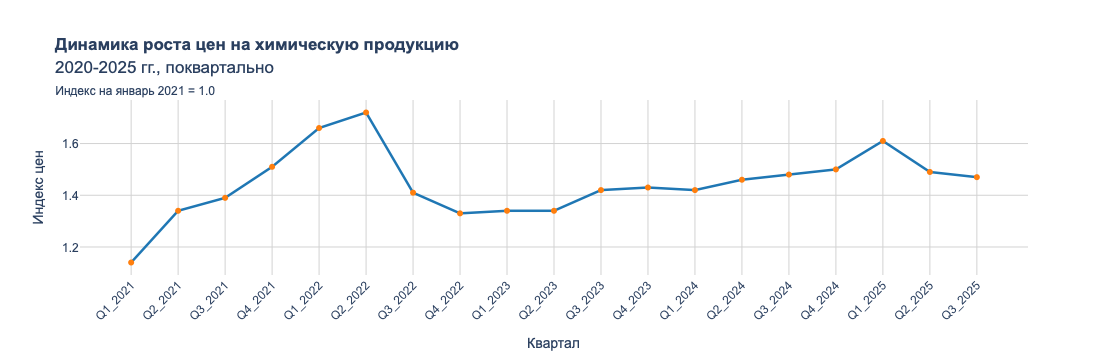

In [5]:
def create_quarterly_features(historical_prices):
    """
    Создает квартальные фичи на основе месячных данных
    Берет последний месяц каждого квартала
    """
    quarterly_features = {}
    
    # Отбираем конечные месяцы кварталов
    quarter_months = {
        'Q1': '03',  # март
        'Q2': '06',  # июнь
        'Q3': '09',  # сентябрь
        'Q4': '12'   # декабрь
    }
    
    for month, price in historical_prices.items():
        year, month_num = month.split('-')
        
        # Проверяем, является ли месяц конечным в квартале
        for quarter, end_month in quarter_months.items():
            if month_num == end_month:
                feature_name = f'Цена_{quarter}_{year}'
                quarterly_features[feature_name] = round(price, 2)
    
    return quarterly_features

quarterly_prices_growth = create_quarterly_features(monthly_price_growth_pd.to_dict())
quarterly_prices_growth = dict(zip(list(map(lambda x: x[5:],quarterly_prices_growth.keys())),quarterly_prices_growth.values()))
quarterly_prices_growth_pd = pd.DataFrame.from_dict(quarterly_prices_growth,orient = 'index').squeeze()

chemical_prices_growth_2020_2025_by_quarter_plot = px.line(
    x=quarterly_prices_growth_pd.index, 
    y=quarterly_prices_growth_pd,
    title='<b>Динамика роста цен на химическую продукцию</b><br>2020-2025 гг., поквартально</b><br><span style="font-size: 12px;">Индекс на январь 2021 = 1.0</span>',
    labels={'x': 'Период', 'y': 'Индекс цен (база = 1)'},
    color_discrete_sequence=['#1f77b4']
)

chemical_prices_growth_2020_2025_by_quarter_plot.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(family='Arial', size=12),
    xaxis=dict(
        showgrid=True, 
        gridwidth=1, 
        gridcolor='lightgray',
        tickangle=-45,
        title='Квартал'
    ),
    yaxis=dict(
        showgrid=True, 
        gridwidth=1, 
        gridcolor='lightgray',
        title='Индекс цен'
    ),
    hovermode='x unified',
    showlegend=False
)

chemical_prices_growth_2020_2025_by_quarter_plot.update_traces(
    mode='lines+markers',
    marker=dict(size=6, color='#ff7f0e'),
    line=dict(width=2.5),
    hovertemplate='<b>%{x}</b><br>Индекс: %{y:.2f}<extra></extra>'
)

chemical_prices_growth_2020_2025_by_quarter_plot.show()

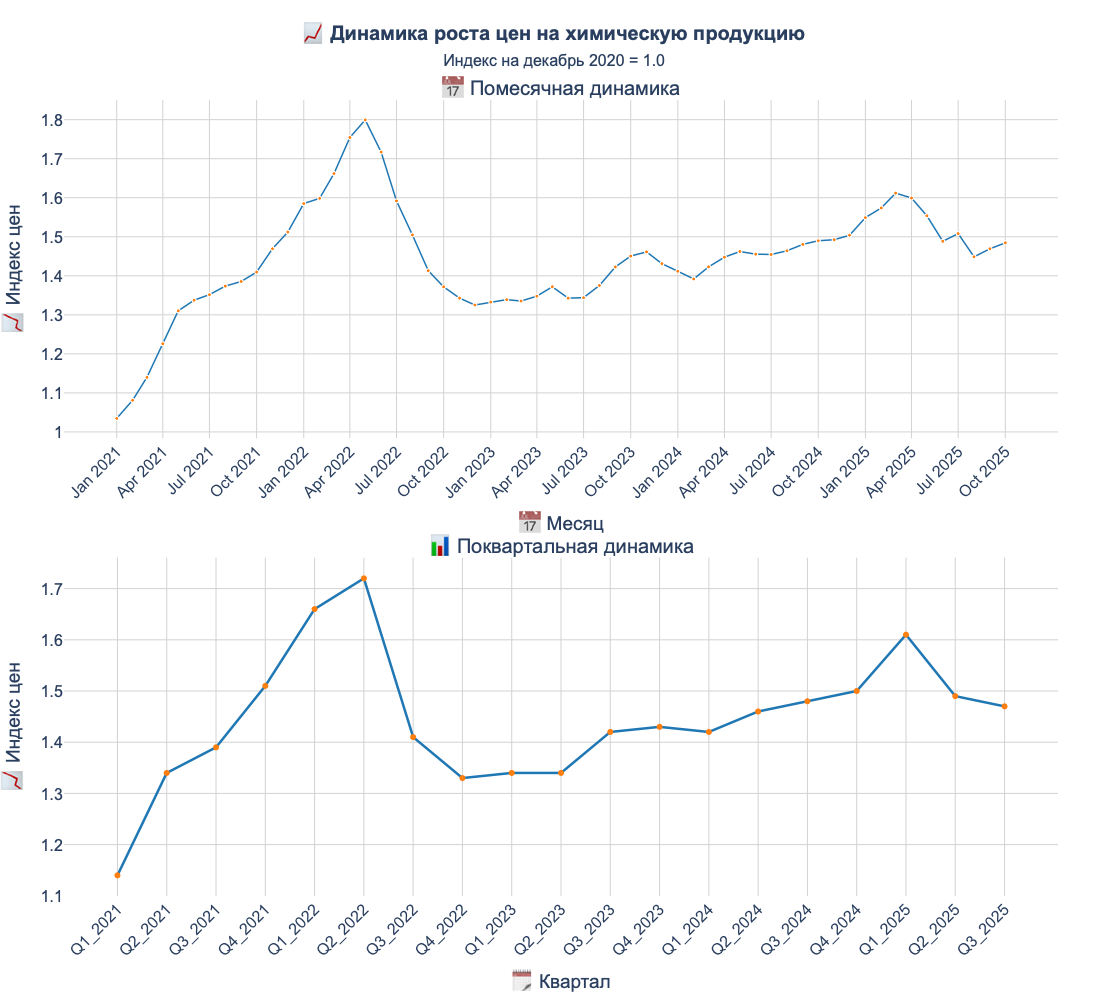

In [6]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Создаем subplots
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=('📅 Помесячная динамика', '📊 Поквартальная динамика'),
    vertical_spacing=0.15,
    shared_xaxes=False
)

# Добавляем месячный график
fig.add_trace(
    go.Scatter(
        x=monthly_price_growth_pd.index,
        y=monthly_price_growth_pd,
        mode='lines+markers',
        name='📅 Месячный',
        line=dict(width=1.5, color='#1f77b4'),
        marker=dict(size=4, color='#ff7f0e', line=dict(width=1, color='white')),
        hovertemplate='<b>%{x|%B %Y}</b><br>Индекс: %{y:.2f}<extra></extra>'
    ),
    row=1, col=1
)

# Добавляем квартальный график
fig.add_trace(
    go.Scatter(
        x=quarterly_prices_growth_pd.index,
        y=quarterly_prices_growth_pd,
        mode='lines+markers',
        name='📊 Квартальный', 
        line=dict(width=2.5, color='#1f77b4'),
        marker=dict(size=6, color='#ff7f0e'),
        hovertemplate='<b>%{x}</b><br>Индекс: %{y:.2f}<extra></extra>'
    ),
    row=2, col=1
)

# Настраиваем оси для месячного графика
fig.update_xaxes(
    showgrid=True, gridwidth=1, gridcolor='lightgray',
    tickangle=-45,
    tickmode='array',
    tickvals=monthly_price_growth_pd.index[::3],
    tickformat='%b %Y',
    title_text='📅 Месяц',
    row=1, col=1
)

fig.update_yaxes(
    showgrid=True, gridwidth=1, gridcolor='lightgray',
    title_text='📈 Индекс цен',
    row=1, col=1
)

# Настраиваем оси для квартального графика  
fig.update_xaxes(
    showgrid=True, gridwidth=1, gridcolor='lightgray',
    tickangle=-45,
    title_text='🗓️ Квартал',
    row=2, col=1
)

fig.update_yaxes(
    showgrid=True, gridwidth=1, gridcolor='lightgray',
    title_text='📈 Индекс цен',
    row=2, col=1
)

# ОДИН update_layout со всеми настройками
fig.update_layout(
    title_text='<b>📈 Динамика роста цен на химическую продукцию</b><br><span style="font-size: 16px;">Индекс на декабрь 2020 = 1.0</span>',
    title_x=0.5,
    title_y=0.96,
    width=1200,
    height=1000,
    title_font_size=20,
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(family='Arial', size=16),
    showlegend=False,
    margin=dict(l=50, r=50, t=100, b=100)
)
fig.layout.annotations[0].update(font=dict(size=20))  # "📅 Помесячная динамика"
fig.layout.annotations[1].update(font=dict(size=20))  # "📊 Поквартальная динамика"

fig.show()


#Сохраняем график в PNG
# fig.write_image(
#     FOLDER_PATH + 'graphs/Rosstat.png',
#     format="png",
#     width=1200,
#     height=1000, 
#     scale=2)


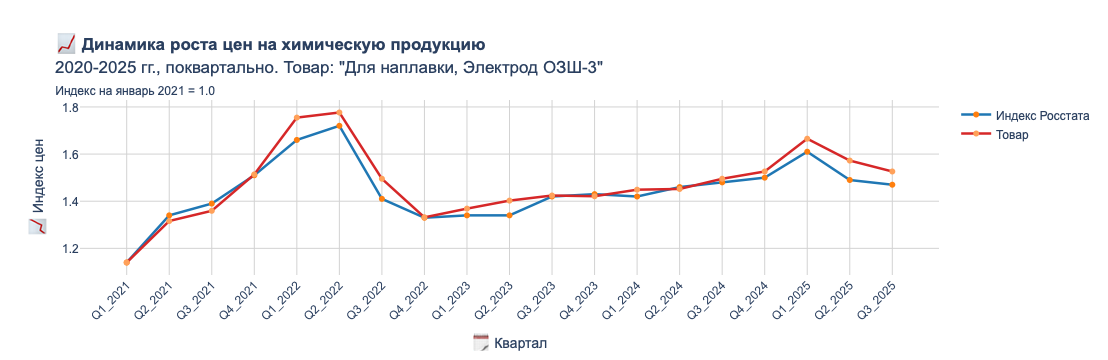

In [7]:
import plotly.graph_objects as go
def realprices_and_rosstat_comparison(data_sample, item_type = ''):
    
    if item_type == 'product':
        prefix = 'Товар:'
        
    elif item_type == 'category':
        prefix = 'Категория:'
    else:
        prefix = ''
    data_sample_price_history = data_sample[[
        'Цена_Q1_2021', 'Цена_Q2_2021', 'Цена_Q3_2021', 'Цена_Q4_2021',
        'Цена_Q1_2022', 'Цена_Q2_2022', 'Цена_Q3_2022', 'Цена_Q4_2022', 
        'Цена_Q1_2023', 'Цена_Q2_2023', 'Цена_Q3_2023', 'Цена_Q4_2023',
        'Цена_Q1_2024', 'Цена_Q2_2024', 'Цена_Q3_2024', 'Цена_Q4_2024',
        'Цена_Q1_2025', 'Цена_Q2_2025', 'Цена_Q3_2025']].squeeze()
    
    data_sample_quarter_scalled = data_sample_price_history.pct_change() + 1
    data_sample_quarter_scalled['Цена_Q1_2021'] = 1.14
    data_sample_quarter_scalled = data_sample_quarter_scalled.cumprod()
    data_sample_quarter_scalled.index = data_sample_quarter_scalled.index.str.slice(5)
    
    def create_quarterly_features(historical_prices):
        """
        Создает квартальные фичи на основе месячных данных
        Берет последний месяц каждого квартала
        """
        quarterly_features = {}
        
        # Отбираем конечные месяцы кварталов
        quarter_months = {
            'Q1': '03',  # март
            'Q2': '06',  # июнь
            'Q3': '09',  # сентябрь
            'Q4': '12'   # декабрь
        }
        
        for month, price in historical_prices.items():
            year, month_num = month.split('-')
            
            # Проверяем, является ли месяц конечным в квартале
            for quarter, end_month in quarter_months.items():
                if month_num == end_month:
                    feature_name = f'Цена_{quarter}_{year}'
                    quarterly_features[feature_name] = round(price, 2)
        
        return quarterly_features
    
    quarterly_prices_growth = create_quarterly_features(monthly_price_growth_pd.to_dict())
    quarterly_prices_growth = dict(zip(list(map(lambda x: x[5:],quarterly_prices_growth.keys())),quarterly_prices_growth.values()))
    quarterly_prices_growth_pd = pd.DataFrame.from_dict(quarterly_prices_growth,orient = 'index').squeeze()
    
    import plotly.graph_objects as go
    
    # Создаем график через go.Figure с сохранением всех настроек
    chemical_prices_growth_2020_2025_by_quarter_plot = go.Figure()
    
    # Добавляем основной график (тот что был в px.line)
    chemical_prices_growth_2020_2025_by_quarter_plot.add_trace(
        go.Scatter(
            x=quarterly_prices_growth_pd.index, 
            y=quarterly_prices_growth_pd,
            mode='lines+markers',
            name='Индекс Росстата',
            line=dict(width=2.5, color='#1f77b4'),
            marker=dict(size=6, color='#ff7f0e'),
            hovertemplate='<b>%{x}</b><br>Индекс: %{y:.2f}<extra></extra>'
        )
    )
    
    # Добавляем второй датасет
    chemical_prices_growth_2020_2025_by_quarter_plot.add_trace(
        go.Scatter(
            x=data_sample_quarter_scalled.index,
            y=data_sample_quarter_scalled,
            mode='lines+markers',
            name='Товар',
            line=dict(width=2.5, color='#d62728'),
            marker=dict(size=6, color='#FFA15A'),
            hovertemplate='<b>%{x}</b><br>Значение: %{y:.2f}<extra></extra>'
        )
    )
    
    # Копируем все настройки layout из px.line
    chemical_prices_growth_2020_2025_by_quarter_plot.update_layout(
        title=f'''<b>📈 Динамика роста цен на химическую продукцию
        </b><br>2020-2025 гг., поквартально. {prefix} \"{data_sample["Название товара"].iloc[0]}\"
        </b><br><span style="font-size: 12px;">Индекс на январь 2021 = 1.0</span>''',
        xaxis_title='Период',
        yaxis_title='Индекс цен (база = 1)',
        plot_bgcolor='white',
        paper_bgcolor='white',
        font=dict(family='Arial', size=12),
        xaxis=dict(
            showgrid=True, 
            gridwidth=1, 
            gridcolor='lightgray',
            tickangle=-45,
            title='🗓️ Квартал'
        ),
        yaxis=dict(
            showgrid=True, 
            gridwidth=1, 
            gridcolor='lightgray',
            title='📈 Индекс цен'
        ),
        hovermode='x unified',
        showlegend=True
    )
    
    chemical_prices_growth_2020_2025_by_quarter_plot.show()

    file_category_name = '_'.join(data_sample["Название товара"].iloc[0][2:].split(' '))
    
    #Сохраняем график в PNG
    # chemical_prices_growth_2020_2025_by_quarter_plot.write_image(
    #     FOLDER_PATH + f'graphs/product_growth_{file_category_name}.png',
    #     format="png",
    #     width=1200,
    #     height=600,
    #     scale=2)

data_sample = data.sample(1)
realprices_and_rosstat_comparison(data_sample, item_type = 'product')

categories_list = data['Категория'].unique().tolist()
emoji_list = ['🧪', '🏭', '💄',' 🛠️', '🔗', '💥']
categories_emoji_list = list(zip(categories_list, emoji_list))

sample_cols = [
        'Цена_Q1_2021', 'Цена_Q2_2021', 'Цена_Q3_2021', 'Цена_Q4_2021',
        'Цена_Q1_2022', 'Цена_Q2_2022', 'Цена_Q3_2022', 'Цена_Q4_2022', 
        'Цена_Q1_2023', 'Цена_Q2_2023', 'Цена_Q3_2023', 'Цена_Q4_2023',
        'Цена_Q1_2024', 'Цена_Q2_2024', 'Цена_Q3_2024', 'Цена_Q4_2024',
        'Цена_Q1_2025', 'Цена_Q2_2025', 'Цена_Q3_2025']

# for category, emoji in categories_emoji_list:
#     data_sample = data.loc[data['Категория'] == category, sample_cols].mean().to_frame().T
#     data_sample['Название товара'] = f'{emoji}{category}'
#     realprices_and_rosstat_comparison(data_sample, item_type = 'category')



## All Groups Boxplot: 📊 Статистика без экстремальных выбросов (N-й перцентиль)

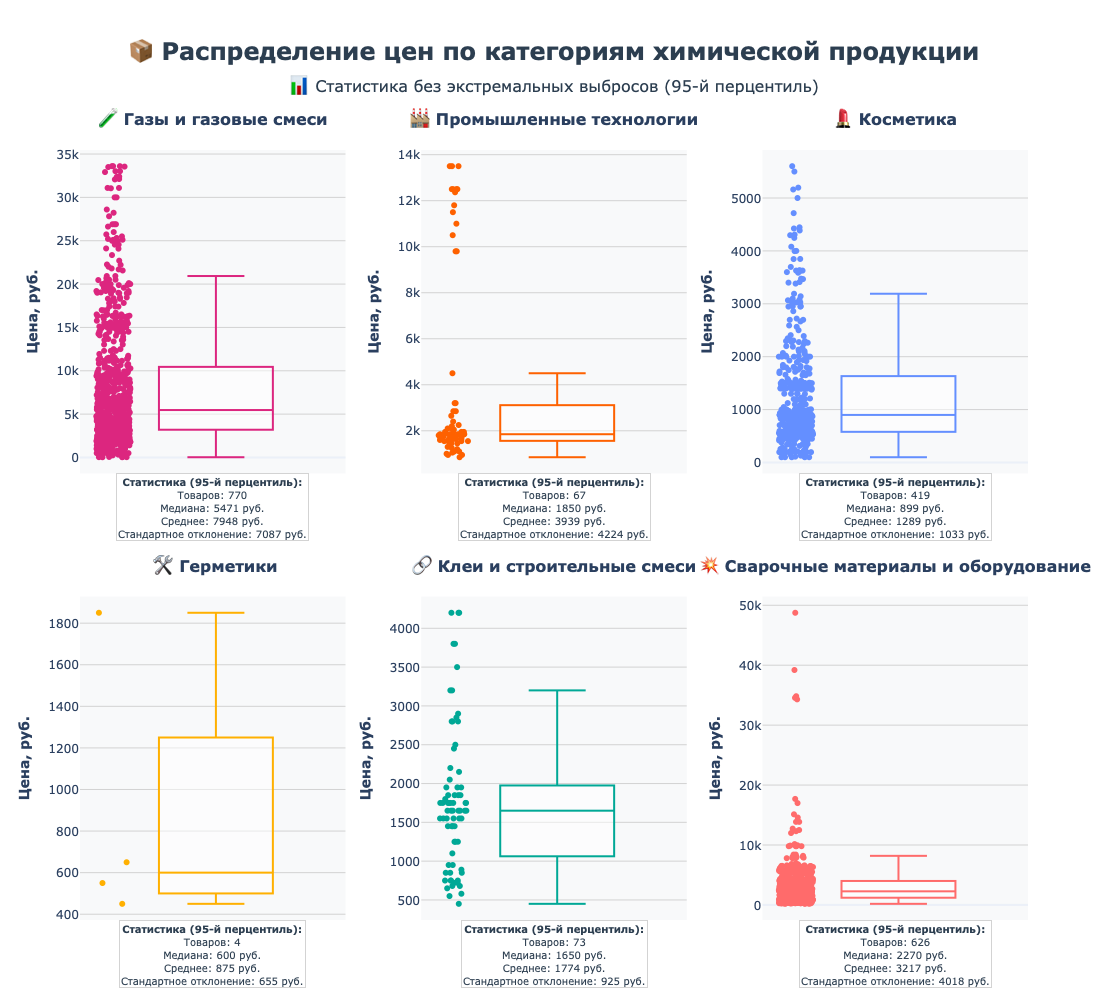

In [8]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

def remove_extreme_outliers(prices, percentile=95):
    threshold = np.percentile(prices, percentile)
    return prices[prices <= threshold]

percentile = 95

categories_list = data['Категория'].unique().tolist()
emoji_list = ['🧪', '🏭', '💄',' 🛠️', '🔗', '💥']
categories_emoji_list = list(zip(categories_list, emoji_list))

# Цветовая схема для категорий
colors = ['#DC267F', '#FE6100', '#648FFF', '#FFB000', '#00A896', '#FF6B6B']

# Создаем subplots (2 строки, 3 колонки)
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=[f"<b>{emoji} {category}</b><br> " for category, emoji in categories_emoji_list],
    vertical_spacing=0.16,
    horizontal_spacing=0.08
)

categories = data['Категория'].unique()

for i, category in enumerate(categories):
    row = i // 3 + 1
    col = i % 3 + 1
    
    category_prices = data.loc[data['Категория'] == category, 'Цена']
    category_prices = remove_extreme_outliers(category_prices, percentile=percentile)
    fig.add_trace(
        go.Box(
            y=category_prices,
            name=category,
            marker_color=colors[i],
            boxpoints='all',  # показываем выбросы
            jitter=0.3,
            pointpos=-1.8,
            showlegend=False,
            line=dict(width=2),
            fillcolor='rgba(255,255,255,0.5)'
        ),
        row=row, col=col
    )
    
    

# Обновляем layout
fig.update_layout(
    title=dict(
        text=f'<b>📦 Распределение цен по категориям химической продукции</b><br><span style="font-size: 16px;">📊 Статистика без экстремальных выбросов ({percentile}-й перцентиль)</span>',
        x=0.5, y = 0.94,
        font=dict(size=24, color='#2C3E50')
    ),
    margin=dict(t=150),
    template='plotly_white',
    height=1000,
    width=1200,
    font=dict(size=12),
    plot_bgcolor='rgba(248,249,250,1)',
    paper_bgcolor='white'
)

# Обновляем оси
fig.update_yaxes(title_text="<b>Цена, руб.</b>", gridcolor='lightgrey', gridwidth=1)
fig.update_xaxes(showticklabels=False)  # скрываем названия на оси X


# Получаем текущие аннотации (включая названия subplots)
current_annotations = list(fig.layout.annotations)
x_poss = [0.14, 0.58, 0.93]
y_poss = [0.6, 0.0]

# Добавляем твои статистические аннотации
for i, category in enumerate(categories):
    row = i // 3 + 1
    col = i % 3 + 1
    
    category_data = data.loc[data['Категория'] == category, 'Цена']
    category_data_filtered = remove_extreme_outliers(category_data, percentile=percentile)
    
    # Вычисляем статистику
    median_price = category_data_filtered.median()
    mean_price = category_data_filtered.mean()
    std_price = category_data_filtered.std()
    
    stats_text = f"""<b>Статистика ({percentile}-й перцентиль):</b><br>Товаров: {len(category_data_filtered)}<br>Медиана: {median_price:.0f} руб.<br>Среднее: {mean_price:.0f} руб.<br>Стандартное отклонение: {std_price:.0f} руб."""
    
    x_pos = x_poss[col-1]
    y_pos = y_poss[row-1]

    # Получаем домены subplot'а
    subplot = fig.get_subplot(row, col)
    x_domain = subplot.xaxis.domain  
    y_domain = subplot.yaxis.domain
    
    # Центр subplot'а
    x_center = (x_domain[0] + x_domain[1]) / 2
    y_bottom = y_domain[0] 
    
    current_annotations.append(
        dict(
            text=stats_text,
            x=x_center, y=y_bottom,
            xref="paper", yref="paper",
            xanchor='center', yanchor='top',
            showarrow=False,
            font=dict(size=10, color='#2C3E50'),
            bgcolor='rgba(255,255,255,0.8)',
            bordercolor='lightgrey',
            borderwidth=1,
        )
    )

# Обновляем ВСЕ аннотации
fig.update_layout(annotations=current_annotations)

fig.show()


# Сохраняем график в PNG
# fig.write_image(
#     FOLDER_PATH + 'graphs/boxplots/Category_Boxplots.png',
#     format="png",
#     width=1200,
#     height=1000, 
#     scale=2)


## All Groups Boxplot: 📊 Полная Статистика (Логарифмическая шкала цен)

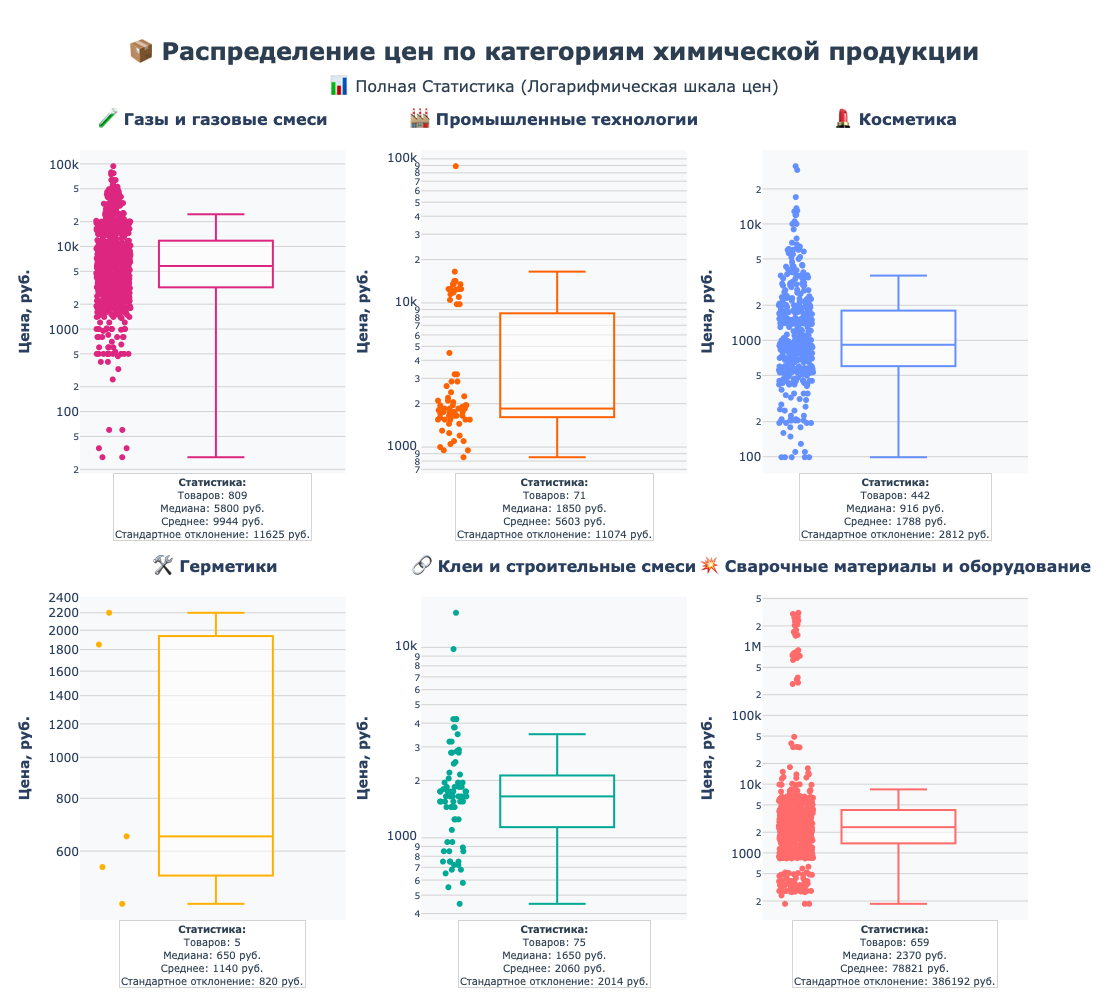

In [9]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

def remove_extreme_outliers(prices, percentile=95):
    threshold = np.percentile(prices, percentile)
    return prices[prices <= threshold]

percentile = 95

categories_list = data['Категория'].unique().tolist()
emoji_list = ['🧪', '🏭', '💄',' 🛠️', '🔗', '💥']
categories_emoji_list = list(zip(categories_list, emoji_list))

# Цветовая схема для категорий
colors = ['#DC267F', '#FE6100', '#648FFF', '#FFB000', '#00A896', '#FF6B6B']

# Создаем subplots (2 строки, 3 колонки)
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=[f"<b>{emoji} {category}</b><br> " for category, emoji in categories_emoji_list],
    vertical_spacing=0.16,
    horizontal_spacing=0.08
)

categories = data['Категория'].unique()

for i, category in enumerate(categories):
    row = i // 3 + 1
    col = i % 3 + 1
    
    category_prices = data.loc[data['Категория'] == category, 'Цена']
    category_prices = category_prices
    fig.add_trace(
        go.Box(
            y=category_prices,
            name=category,
            marker_color=colors[i],
            boxpoints='all',  # показываем выбросы
            jitter=0.3,
            pointpos=-1.8,
            showlegend=False,
            line=dict(width=2),
            fillcolor='rgba(255,255,255,0.5)'
        ),
        row=row, col=col
    )
    
    

# Обновляем layout
fig.update_layout(
    title=dict(
        text=f'<b>📦 Распределение цен по категориям химической продукции</b><br><span style="font-size: 16px;">📊 Полная Статистика (Логарифмическая шкала цен)</span>',
        x=0.5, y = 0.94,
        font=dict(size=24, color='#2C3E50')
    ),
    margin=dict(t=150),
    template='plotly_white',
    height=1000,
    width=1200,
    font=dict(size=12),
    plot_bgcolor='rgba(248,249,250,1)',
    paper_bgcolor='white'
)

# Обновляем оси
fig.update_yaxes(type = 'log',title_text="<b>Цена, руб.</b>", gridcolor='lightgrey', gridwidth=1)
fig.update_xaxes(showticklabels=False)  # скрываем названия на оси X


# Получаем текущие аннотации (включая названия subplots)
current_annotations = list(fig.layout.annotations)
x_poss = [0.14, 0.58, 0.93]
y_poss = [0.6, 0.0]

# Добавляем твои статистические аннотации
for i, category in enumerate(categories):
    row = i // 3 + 1
    col = i % 3 + 1
    
    category_data = data.loc[data['Категория'] == category, 'Цена']
    category_data_filtered = category_data
    
    # Вычисляем статистику
    median_price = category_data_filtered.median()
    mean_price = category_data_filtered.mean()
    std_price = category_data_filtered.std()
    
    stats_text = f"""<b>Статистика:</b><br>Товаров: {len(category_data_filtered)}<br>Медиана: {median_price:.0f} руб.<br>Среднее: {mean_price:.0f} руб.<br>Стандартное отклонение: {std_price:.0f} руб."""
    
    x_pos = x_poss[col-1]
    y_pos = y_poss[row-1]

    # Получаем домены subplot'а
    subplot = fig.get_subplot(row, col)
    x_domain = subplot.xaxis.domain  
    y_domain = subplot.yaxis.domain
    
    # Центр subplot'а
    x_center = (x_domain[0] + x_domain[1]) / 2
    y_bottom = y_domain[0] 
    
    current_annotations.append(
        dict(
            text=stats_text,
            x=x_center, y=y_bottom,
            xref="paper", yref="paper",
            xanchor='center', yanchor='top',
            showarrow=False,
            font=dict(size=10, color='#2C3E50'),
            bgcolor='rgba(255,255,255,0.8)',
            bordercolor='lightgrey',
            borderwidth=1,
        )
    )

# Обновляем ВСЕ аннотации
fig.update_layout(annotations=current_annotations)

fig.show()


# Сохраняем график в PNG
# fig.write_image(
#     FOLDER_PATH + 'graphs/boxplots/Category_Boxplot_log.png',
#     format="png",
#     width=1200,
#     height=1000, 
#     scale=2)


## Single Group Boxplot: 📊 Статистика без экстремальных выбросов (N-й перцентиль)

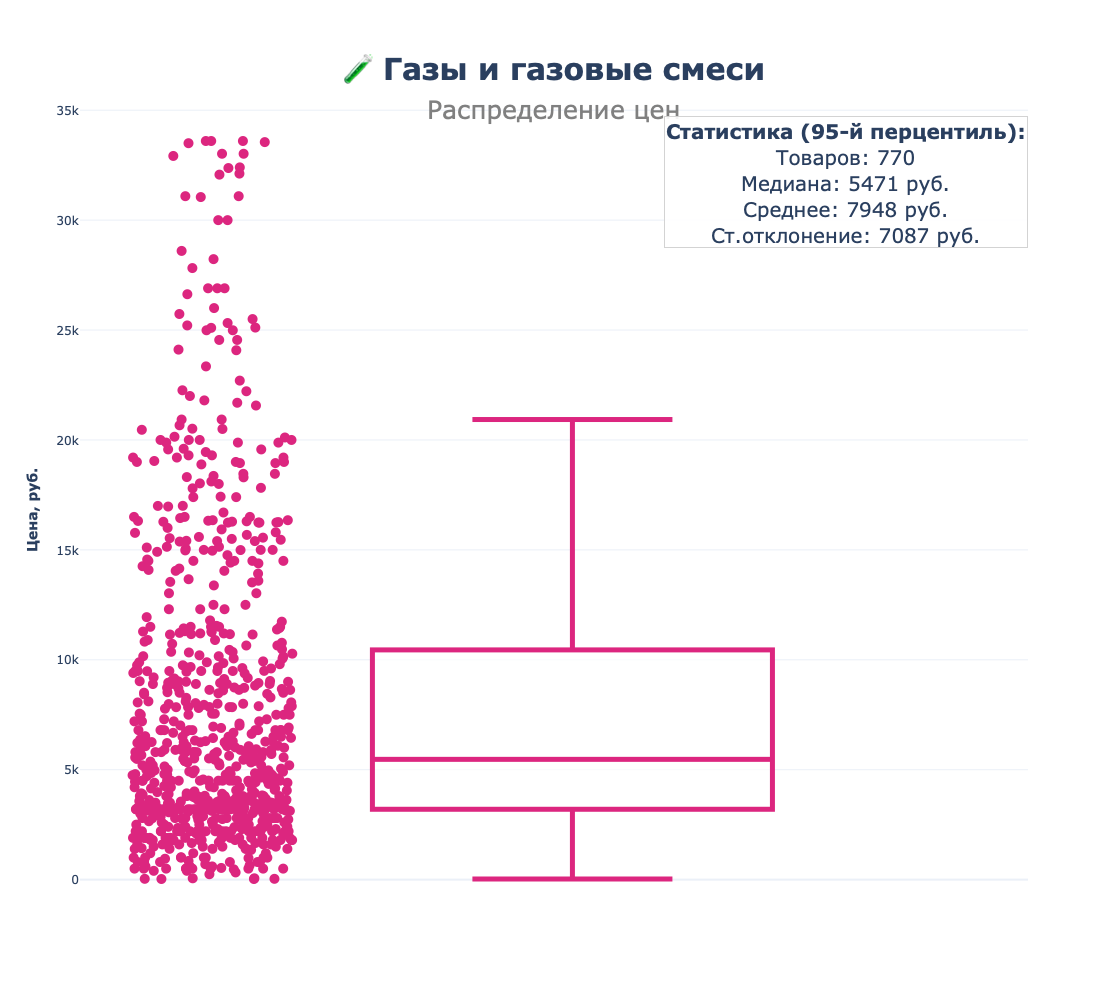

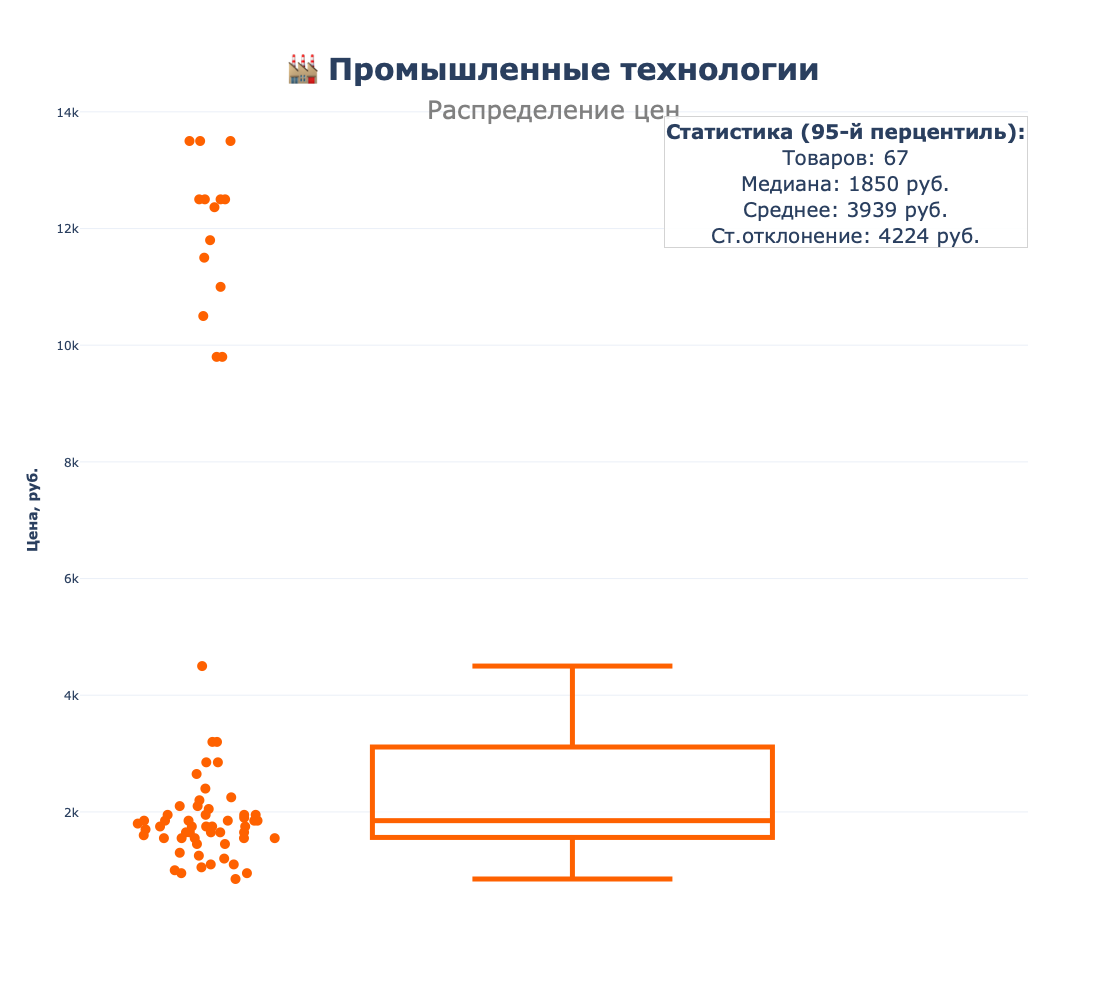

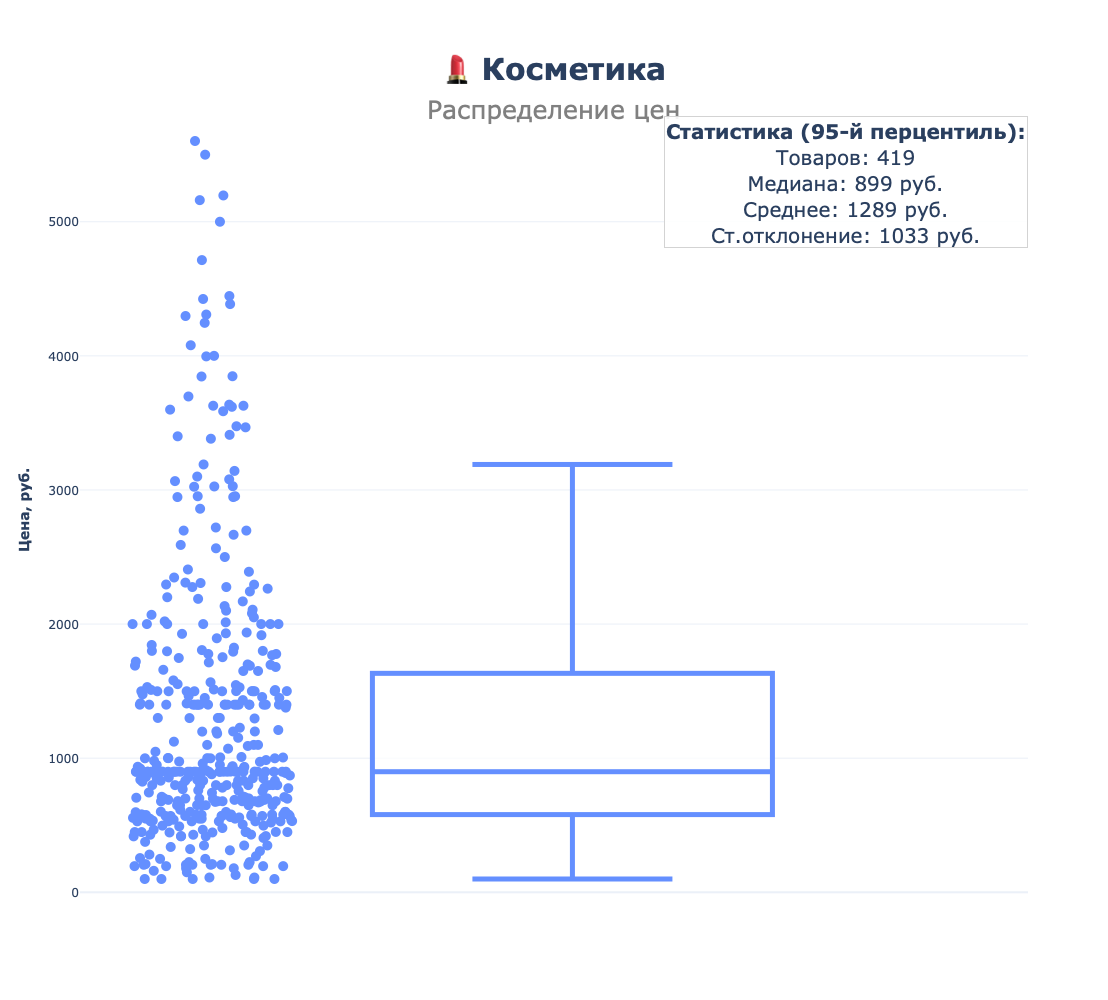

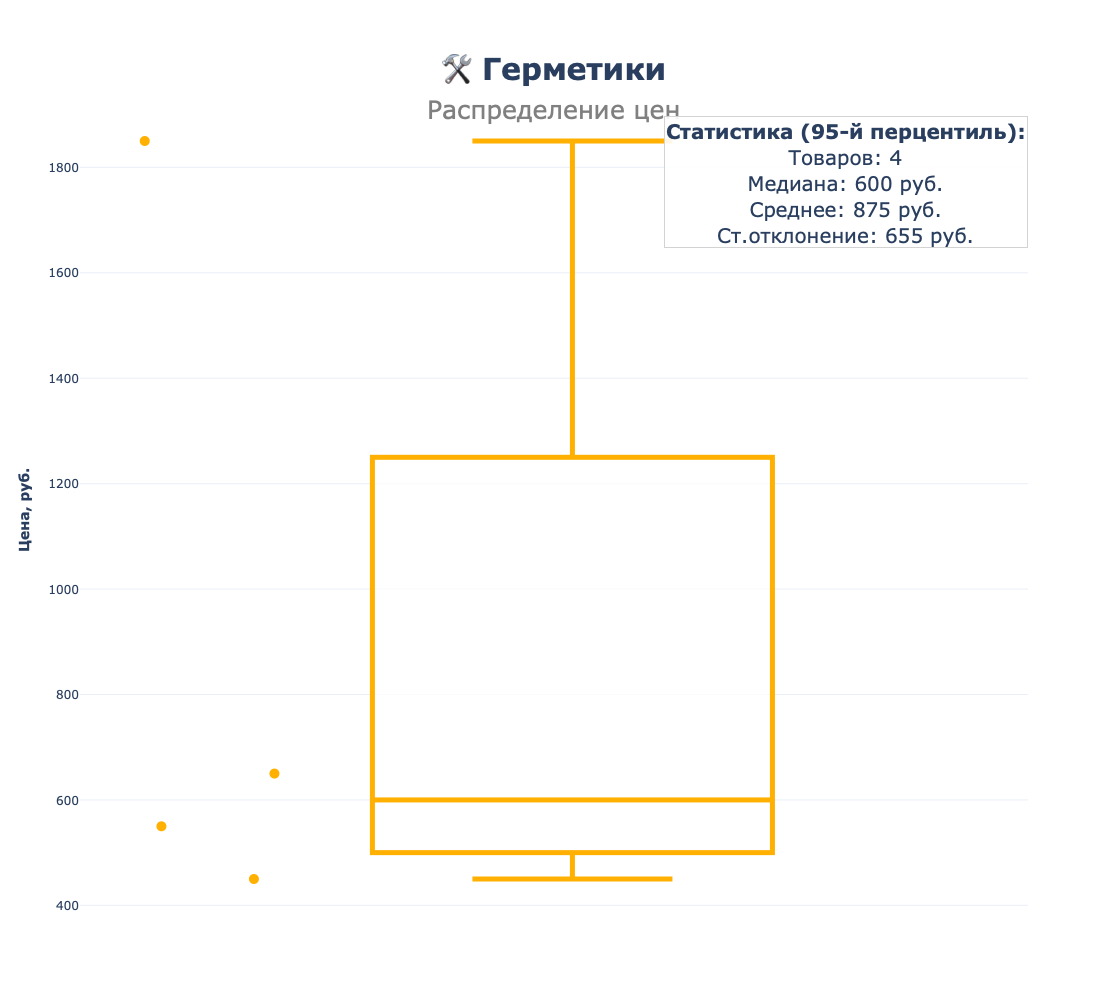

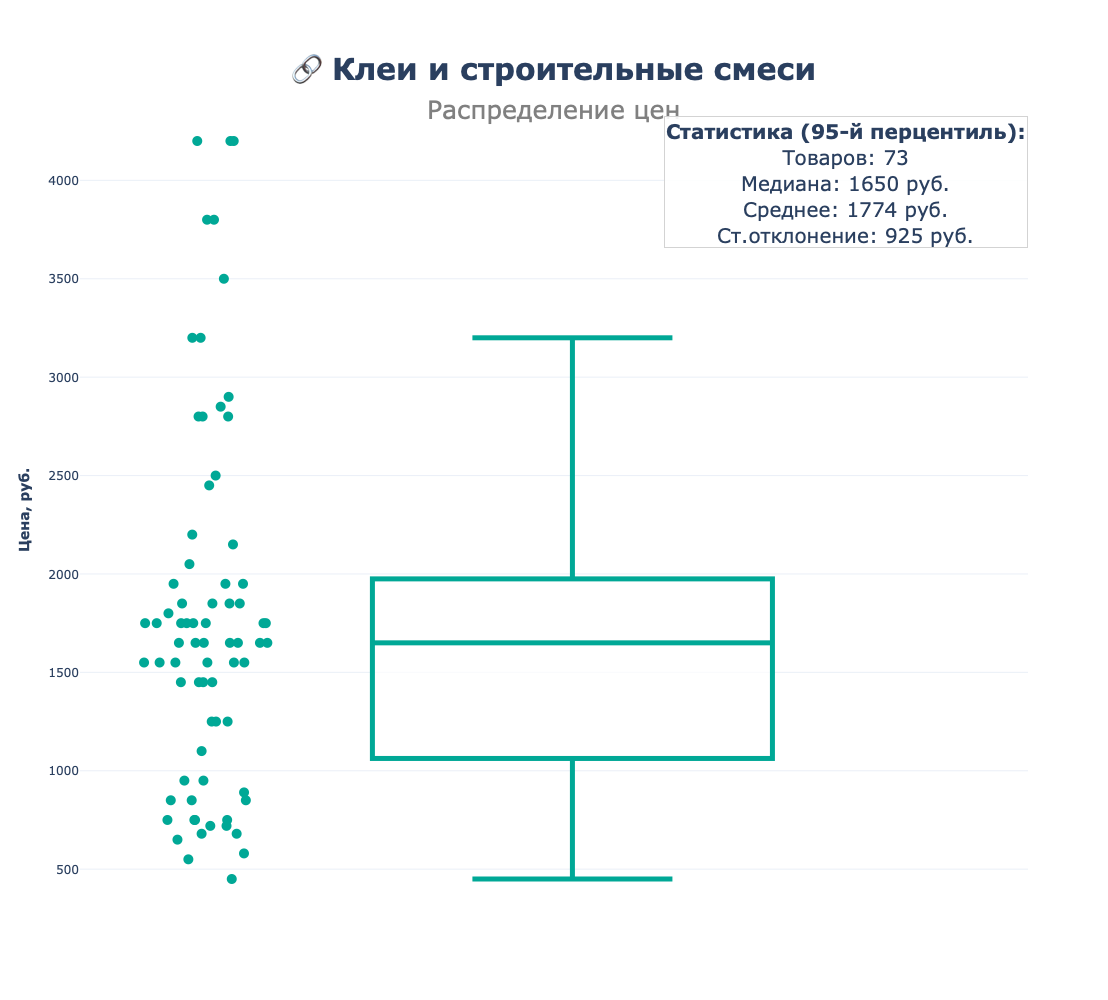

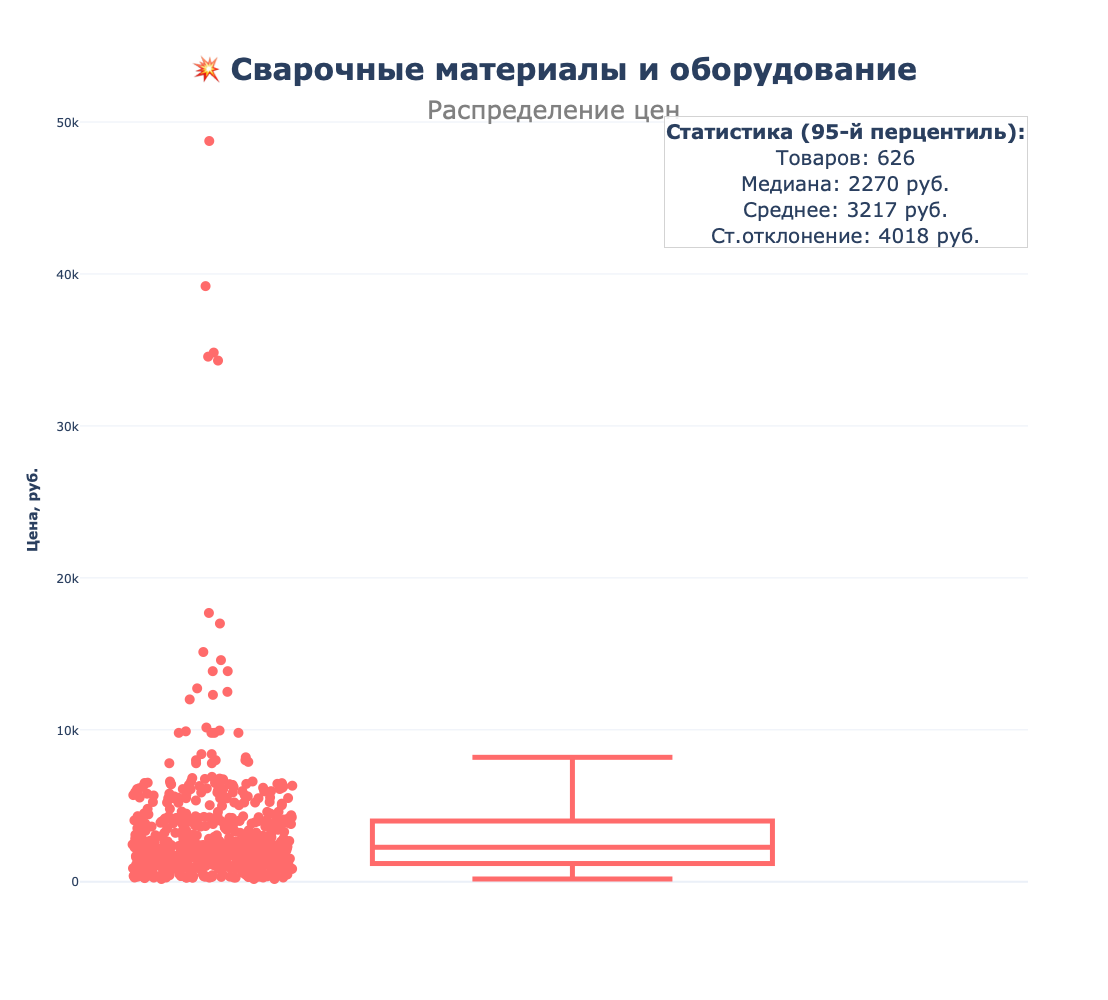

In [10]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd


def remove_extreme_outliers(prices, percentile=95):
    threshold = np.percentile(prices, percentile)
    return prices[prices <= threshold]

percentile = 95

categories_list = data['Категория'].unique().tolist()
emoji_list = ['🧪', '🏭', '💄','🛠️', '🔗', '💥']
categories_emoji_list = list(zip(categories_list, emoji_list))

# Цветовая схема для категорий
#colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD']
colors = ['#DC267F', '#FE6100', '#648FFF', '#FFB000', '#00A896', '#FF6B6B']
# Дополнительно: отдельные красивые графики для каждой категории
for i, category in enumerate(categories):
    
    emoji = categories_emoji_list[i][1]
    
    category_prices = data.loc[data['Категория'] == category, 'Цена']
    category_prices = remove_extreme_outliers(category_prices, percentile=percentile)
    fig_single = go.Figure()
    
    fig_single.add_trace(go.Box(
        y=category_prices,
        name = category,
        marker_color=colors[i],
        boxpoints='all',  # показываем все точки
        jitter=0.4,
        pointpos=-1.8,
        line=dict(width=5, color=colors[i]),
        marker=dict(size=10),  # увеличить размер точек
        fillcolor='rgba(255,255,255,0.7)',
        hoverinfo='y'
    ))
    
    # Статистика для аннотации
    median_price = category_prices.median()
    mean_price = category_prices.mean()
    std_price = category_prices.std()
    
    fig_single.update_layout(
        title=dict(
            text=f'<b>{emoji} {category}</b><br><span style="font-size:25px; color:gray">Распределение цен</span>',
            font=dict(size=30),
            x=0.5, y = 0.92
        ),
        xaxis=dict(showticklabels=False, title_text=""),
        yaxis_title="<b>Цена, руб.</b>",
        showlegend=False,
        template='plotly_white',
        height=1000,
        width=1200,
        font=dict(size=12),
        annotations=[
            dict(
                x=1.0, y=0.98,
                xref="paper", yref="paper",
                text=f"<b>Статистика ({percentile}-й перцентиль):</b><br>Товаров: {len(category_prices)}<br>Медиана: {median_price:.0f} руб.<br>Среднее: {mean_price:.0f} руб.<br>Ст.отклонение: {std_price:.0f} руб.",
                showarrow=False,
                bgcolor='rgba(255,255,255,0.9)',
                bordercolor='lightgrey',
                borderwidth=1,
                font=dict(size=20)
            )
        ]
    )
    
    fig_single.show()
    
    # Сохраняем график в PNG
    # fig_single.write_image(
    #     FOLDER_PATH + 'graphs/boxplots/' + f'{category}_boxplots.png',
    #     format="png",
    #     width=1200,
    #     height=1000, 
    #     scale=2)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2061 entries, 0 to 2060
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Компания                2061 non-null   object 
 1   Категория               2061 non-null   object 
 2   Название товара         2061 non-null   object 
 3   Цена                    2061 non-null   float64
 4   Цена за единицу объема  2061 non-null   float64
 5   Скидочная Цена          2061 non-null   float64
 6   Процент скидки          2061 non-null   float64
 7   Объем                   2061 non-null   float64
 8   Единицы Измерения       2061 non-null   object 
 9   Цена_Q3_2025            2061 non-null   int64  
 10  Цена_Q2_2025            2061 non-null   int64  
 11  Цена_Q1_2025            2061 non-null   int64  
 12  Цена_Q4_2024            2061 non-null   int64  
 13  Цена_Q3_2024            2061 non-null   int64  
 14  Цена_Q2_2024            2061 non-null   int64

## Bar: 📊 Количество товаров по категориям

Категория
Газы и газовые смеси                  809
Сварочные материалы и оборудование    659
Косметика                             442
Клеи и строительные смеси              75
Промышленные технологии                71
Герметики                               5
Name: count, dtype: int64


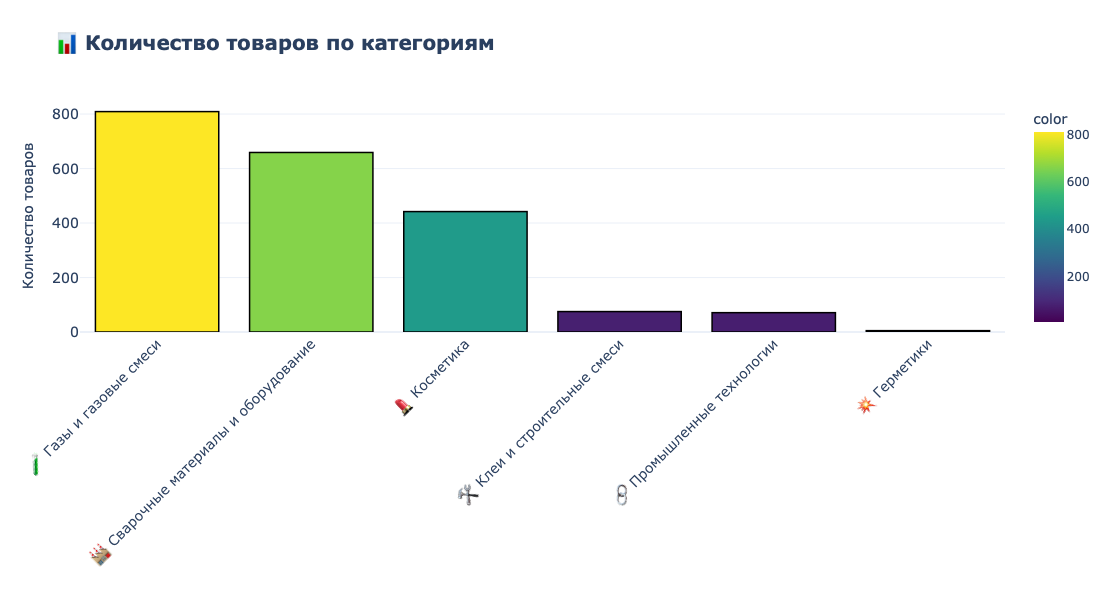

In [32]:
import plotly.express as px

categories_count = data['Категория'].value_counts()
categories_list = data['Категория'].value_counts().index.tolist()
emoji_list = ['🧪', '🏭', '💄',' 🛠️', '🔗', '💥']
categories_emoji_list = list(zip(categories_list, emoji_list))
print(categories_count)

fig = px.bar(
    x= [f'{category} {emoji}' for emoji, category in categories_emoji_list],
    y=categories_count.values,
    title='<b>📊 Количество товаров по категориям</b>',
    labels={'x': '', 'y': 'Количество товаров'},
    color=categories_count.values,
    color_continuous_scale='Viridis'
)

fig.update_layout(
    template='plotly_white',
    height=600,
    width=900,
    font=dict(size=12),
    title_font_size=20,
    showlegend=False,
    xaxis_tickangle=-45
)

fig.update_traces(
    marker_line_color='black',
    marker_line_width=1.5,
    hovertemplate='<b>%{x}</b><br>Товаров: %{y}'
)

fig.update_xaxes(tickfont=dict(size=14))
fig.update_yaxes(tickfont=dict(size=14))

fig.show()

# Сохраняем график в PNG
fig.write_image(
    FOLDER_PATH + 'graphs/' + f'categories_number_of_products_bar.png',
    format="png",
    width=900,
    height=600, 
    scale=2)

## Bar: 📊 Количество товаров по компаниям

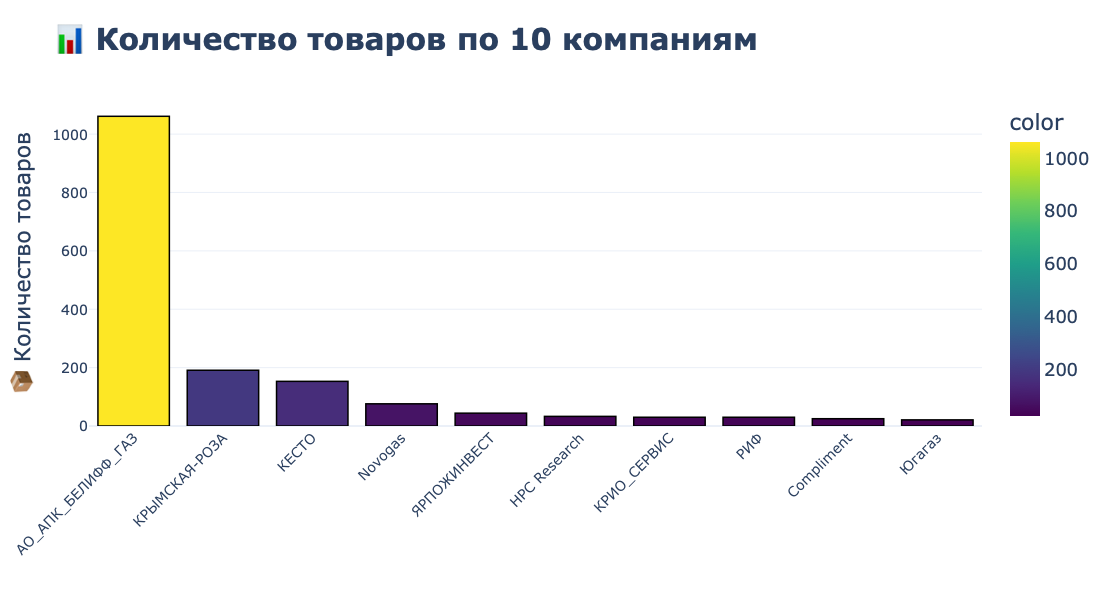

In [37]:
import plotly.express as px
n_companies = 10
companies_count = data['Компания'].value_counts()[:n_companies]

fig = px.bar(
    x=companies_count.index,
    y=companies_count.values,
    title=f'<b>📊 Количество товаров по {n_companies} компаниям</b>',
    labels={'x': '', 'y': '📦 Количество товаров'},
    color=companies_count.values,
    color_continuous_scale='Viridis'
)

fig.update_layout(
    template='plotly_white',
    height=600,
    width=900,
    font=dict(size=18),
    title_font_size=30,
    showlegend=False,
    xaxis_tickangle=-45
)

fig.update_traces(
    marker_line_color='black',
    marker_line_width=1.5,
    hovertemplate='<b>%{x}</b><br>Товаров: %{y}'
)

fig.update_xaxes(tickfont=dict(size=14))
fig.update_yaxes(tickfont=dict(size=14))

fig.show()

#Сохраняем график в PNG
# fig.write_image(
#     FOLDER_PATH + 'graphs/' + f'fisrt_{n_companies}_companies_number_of_products_bar.png',
#     format="png",
#     width=900,
#     height=600, 
#     scale=2)

In [14]:
data['Единицы Измерения'].value_counts()

Единицы Измерения
литр    1365
кг       692
м2         2
шт         2
Name: count, dtype: int64

In [36]:
data['Компания'].value_counts()

Компания
АО_АПК_БЕЛИФФ_ГАЗ            1061
КРЫМСКАЯ-РОЗА                 191
КЕСТО                         153
Novogas                        76
ЯРПОЖИНВЕСТ                    44
                             ... 
Русское Поле                    1
сыворотка для волос Корея       1
FOREST FLOWERS                  1
Trixosil                        1
vichy                           1
Name: count, Length: 179, dtype: int64

In [26]:
data['Категория'].value_counts()

Категория
Газы и газовые смеси                  809
Сварочные материалы и оборудование    659
Косметика                             442
Клеи и строительные смеси              75
Промышленные технологии                71
Герметики                               5
Name: count, dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2061 entries, 0 to 2060
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Компания                2061 non-null   object 
 1   Категория               2061 non-null   object 
 2   Название товара         2061 non-null   object 
 3   Цена                    2061 non-null   float64
 4   Цена за единицу объема  2061 non-null   float64
 5   Скидочная Цена          2061 non-null   float64
 6   Процент скидки          2061 non-null   float64
 7   Объем                   2061 non-null   float64
 8   Единицы Измерения       2061 non-null   object 
 9   Цена_Q3_2025            2061 non-null   int64  
 10  Цена_Q2_2025            2061 non-null   int64  
 11  Цена_Q1_2025            2061 non-null   int64  
 12  Цена_Q4_2024            2061 non-null   int64  
 13  Цена_Q3_2024            2061 non-null   int64  
 14  Цена_Q2_2024            2061 non-null   int64

In [16]:
companies_count = data['Компания'].value_counts()
companies_count

Компания
АО_АПК_БЕЛИФФ_ГАЗ            1061
КРЫМСКАЯ-РОЗА                 191
КЕСТО                         153
Novogas                        76
ЯРПОЖИНВЕСТ                    44
                             ... 
Русское Поле                    1
сыворотка для волос Корея       1
FOREST FLOWERS                  1
Trixosil                        1
vichy                           1
Name: count, Length: 179, dtype: int64

In [17]:
prices_info_by_categories = data.groupby('Категория')[['Цена', 'Цена за единицу объема', 'Скидочная Цена']].agg('median')
prices_info_by_categories

Цена  Цена за единицу объема  \
Категория                                                            
Газы и газовые смеси                5800.0              449.600000   
Герметики                            650.0             2096.774194   
Клеи и строительные смеси           1650.0              123.333333   
Косметика                            916.0             8990.000000   
Промышленные технологии             1850.0              123.333333   
Сварочные материалы и оборудование  2370.0             1734.000000   

                                    Скидочная Цена  
Категория                                           
Газы и газовые смеси                        5568.0  
Герметики                                    590.0  
Клеи и строительные смеси                   1520.0  
Косметика                                    810.0  
Промышленные технологии                     1720.0  
Сварочные материалы и оборудование          2088.0

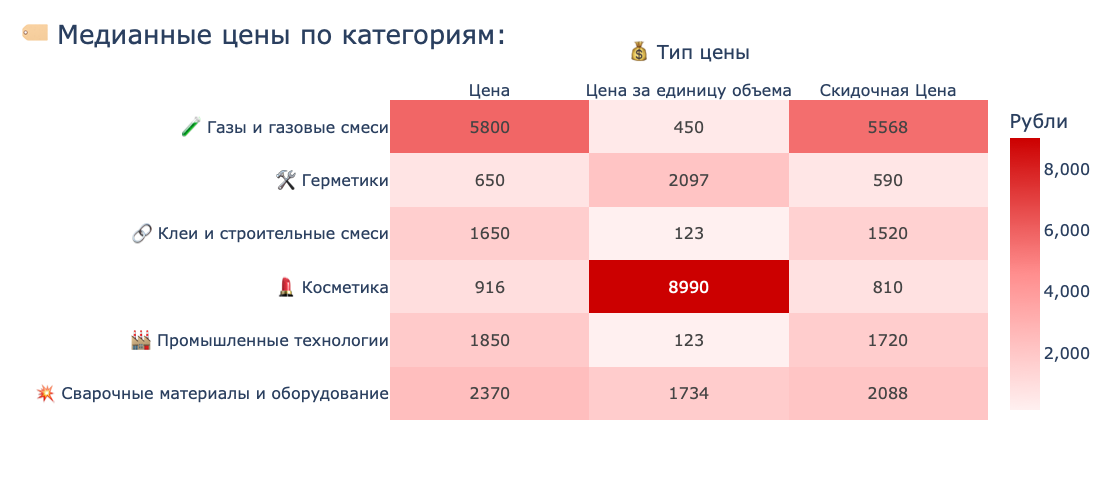

In [18]:
import plotly.express as px

prices_info_by_categories = data.groupby('Категория')[['Цена', 'Цена за единицу объема', 'Скидочная Цена']].agg('median')

# Создаем словарь категория -> эмодзи
categories_list = data['Категория'].unique().tolist()
emoji_list = ['🧪', '🏭', '💄',' 🛠️', '🔗', '💥']
emoji_dict = dict(zip(categories_list, emoji_list))

# Обновляем индекс датафрейма с эмодзи
prices_info_by_categories_emoji = prices_info_by_categories.copy()
prices_info_by_categories_emoji.index = [f"{emoji_dict[cat]} {cat}" for cat in prices_info_by_categories.index]

# Строим heatmap с эмодзи
fig = px.imshow(
    prices_info_by_categories_emoji,
    color_continuous_scale=[(0, "#fff0f0"), (0.5, "#ff8e8e"), (1, "#cc0000")],
    aspect="auto",
    text_auto='.0f',
    title="🏷️ Медианные цены по категориям:",
    labels=dict(x="Тип цены", y="", color="Медиана, руб.")
)

# Улучшаем внешний вид
fig.update_layout(
    xaxis=dict(
        side="top"  # Подписи колонок сверху
    ),
    xaxis_title="💰 Тип цены",
    yaxis_title="",
    font=dict(size=16),
    height=500,  # Подбираем высоту под количество категорий
    width=1100,
    title_x=0.02,  # Центрируем заголовок
    title_y=0.95,
    title_font_size=26
)

# Красивый hover
fig.update_traces(
    hovertemplate="<b>%{y}</b><br>%{x}: %{z:,} руб.<extra></extra>"
)

# Улучшаем отображение цветовой шкалы
fig.update_coloraxes(
    colorbar_title="Рубли",
    colorbar_tickformat=","
)

fig.show()


#Сохраняем график в PNG
# fig.write_image(
#     FOLDER_PATH + 'graphs/' + f'heatmap_median_prices_by_category.png',
#     format="png",
#     width=1100,
#     height=500, 
#     scale=2)

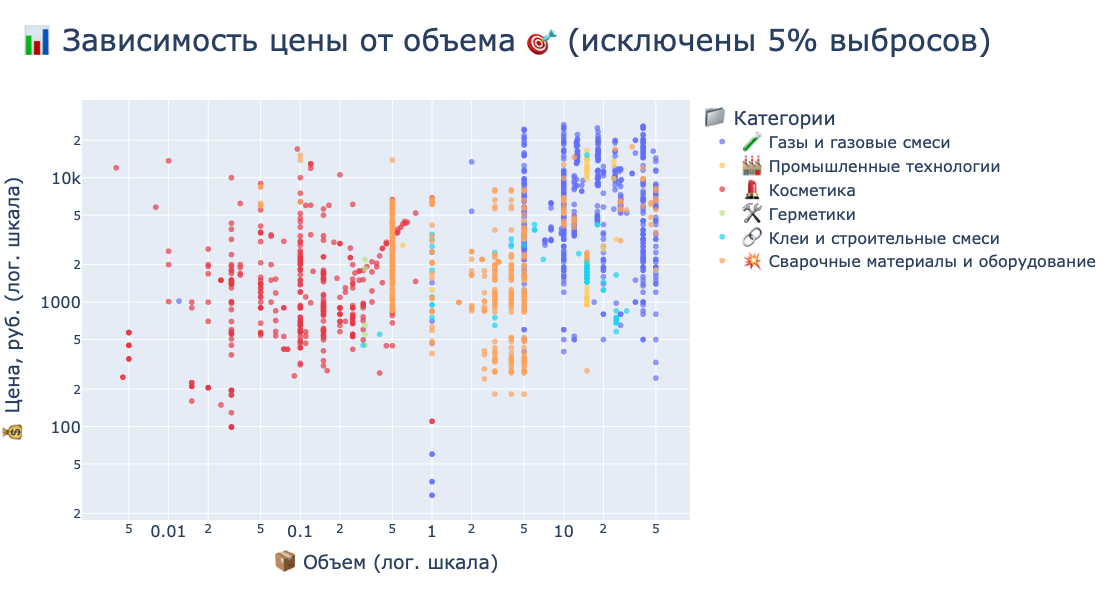

In [19]:
# Фильтруем данные
def remove_extreme_outliers(prices, percentile=95):
    threshold = np.percentile(prices, percentile)
    return prices[prices <= threshold]
    
percentile=95
threshold_price = np.percentile(data['Цена'], percentile)
threshold_volume = np.percentile(data['Объем'], percentile)
filtered_data = data[(data['Цена'] <= threshold_price) & (data['Объем'] <= threshold_volume)].copy()

# Используем ТВОИ эмодзи
categories_list = data['Категория'].unique().tolist()
emoji_list = ['🧪', '🏭', '💄','🛠️', '🔗', '💥']
category_emojis = dict(zip(categories_list, emoji_list))
filtered_data['Категория с эмодзи'] = filtered_data['Категория'].map(category_emojis) + ' ' + filtered_data['Категория']

# Создаем кастомную цветовую схему для всех категорий
category_colors = {
    '🧪 Газы и газовые смеси': '#636EFA',     
    '🛠️ Герметики': '#B6E880',    
    '🔗 Клеи и строительные смеси': '#19D3F3',
    '💄 Косметика': '#E63946',   
    '🏭 Промышленные технологии': '#FECB52',
    '💥 Сварочные материалы и оборудование': '#FFA15A'  
}

# Создаем улучшенный scatter plot
fig = px.scatter(
    filtered_data,
    x='Объем',
    y='Цена',
    color='Категория с эмодзи',
    color_discrete_map=category_colors,  # Применяем кастомные цвета для всех категорий
    title=f'📊 Зависимость цены от объема 🎯 (исключены {100-percentile}% выбросов)',
    labels={
        'Цена': '💰 Цена, руб.', 
        'Объем': '📦 Объем',
        'Категория с эмодзи': '📁 Категории'
    },
    opacity=0.7,
    size_max=10
)

# Улучшаем внешний вид
fig.update_layout(
    xaxis_title="📦 Объем",
    yaxis_title="💰 Цена, руб.",
    legend_title="📁 Категории",
    font=dict(size=16),
    height=600,
    width=1100,
    title_x=0.02,  # Центрируем заголовок
    title_y=0.95,
    title_font_size=30
)

fig.update_xaxes(type="log", title="📦 Объем (лог. шкала)")
fig.update_yaxes(type="log", title="💰 Цена, руб. (лог. шкала)")

fig.update_traces(
    hovertemplate="<b>%{customdata[0]}</b><br>💰 Цена: %{y:,} руб.<br>📦 Объем: %{x:,}<extra></extra>",
    customdata=filtered_data[['Название товара']]
)

fig.show()

#Сохраняем график в PNG
# fig.write_image(
#     FOLDER_PATH + 'graphs/' + f'scatter_price_log_volume_log.png',
#     format="png",
#     width=1100,
#     height=600, 
#     scale=2)

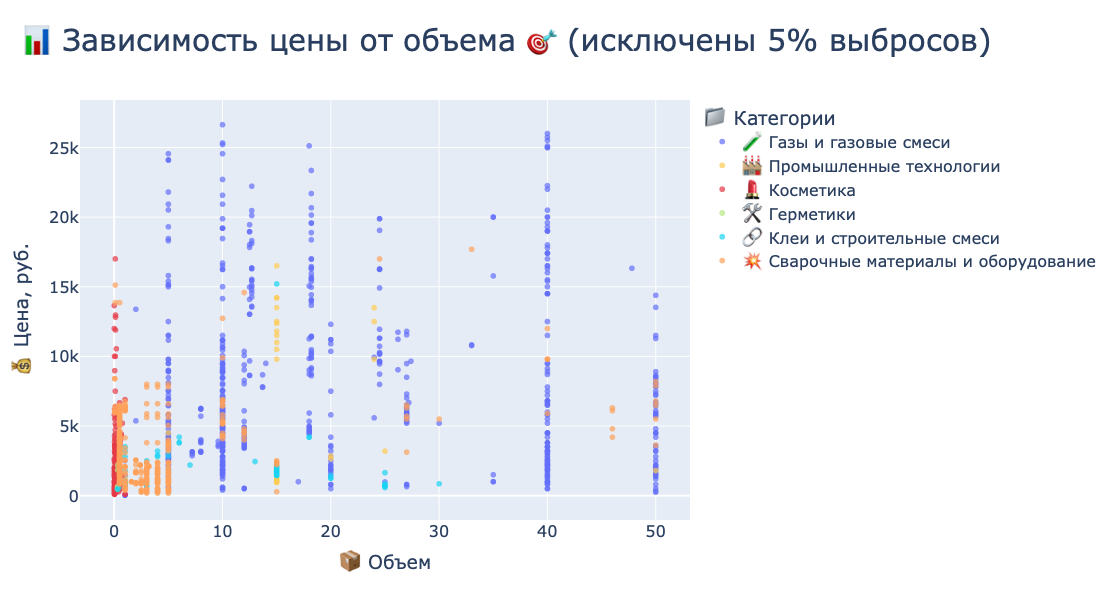

In [20]:
# Фильтруем данные
def remove_extreme_outliers(prices, percentile=95):
    threshold = np.percentile(prices, percentile)
    return prices[prices <= threshold]
    
percentile=95
threshold_price = np.percentile(data['Цена'], percentile)
threshold_volume = np.percentile(data['Объем'], percentile)
filtered_data = data[(data['Цена'] <= threshold_price) & (data['Объем'] <= threshold_volume)].copy()

# Используем ТВОИ эмодзи
categories_list = data['Категория'].unique().tolist()
emoji_list = ['🧪', '🏭', '💄','🛠️', '🔗', '💥']
category_emojis = dict(zip(categories_list, emoji_list))
filtered_data['Категория с эмодзи'] = filtered_data['Категория'].map(category_emojis) + ' ' + filtered_data['Категория']

# Создаем кастомную цветовую схему для всех категорий
category_colors = {
    '🧪 Газы и газовые смеси': '#636EFA',     
    '🛠️ Герметики': '#B6E880',    
    '🔗 Клеи и строительные смеси': '#19D3F3',
    '💄 Косметика': '#E63946',   
    '🏭 Промышленные технологии': '#FECB52',
    '💥 Сварочные материалы и оборудование': '#FFA15A'  
}

# Создаем улучшенный scatter plot
fig = px.scatter(
    filtered_data,
    x='Объем',
    y='Цена',
    color='Категория с эмодзи',
    color_discrete_map=category_colors,  # Применяем кастомные цвета для всех категорий
    title=f'📊 Зависимость цены от объема 🎯 (исключены {100-percentile}% выбросов)',
    labels={
        'Цена': '💰 Цена, руб.', 
        'Объем': '📦 Объем',
        'Категория с эмодзи': '📁 Категории'
    },
    opacity=0.7,
    size_max=10
)

# Улучшаем внешний вид
fig.update_layout(
    xaxis_title="📦 Объем",
    yaxis_title="💰 Цена, руб.",
    legend_title="📁 Категории",
    font=dict(size=16),
    height=600,
    width=1100,
    title_x=0.02,  # Центрируем заголовок
    title_y=0.95,
    title_font_size=30
)

fig.update_xaxes(title="📦 Объем")
fig.update_yaxes(title="💰 Цена, руб.")

fig.update_traces(
    hovertemplate="<b>%{customdata[0]}</b><br>💰 Цена: %{y:,} руб.<br>📦 Объем: %{x:,}<extra></extra>",
    customdata=filtered_data[['Название товара']]
)

fig.show()

#Сохраняем график в PNG
# fig.write_image(
#     FOLDER_PATH + 'graphs/' + f'scatter_price_volume.png',
#     format="png",
#     width=1100,
#     height=600, 
#     scale=2)

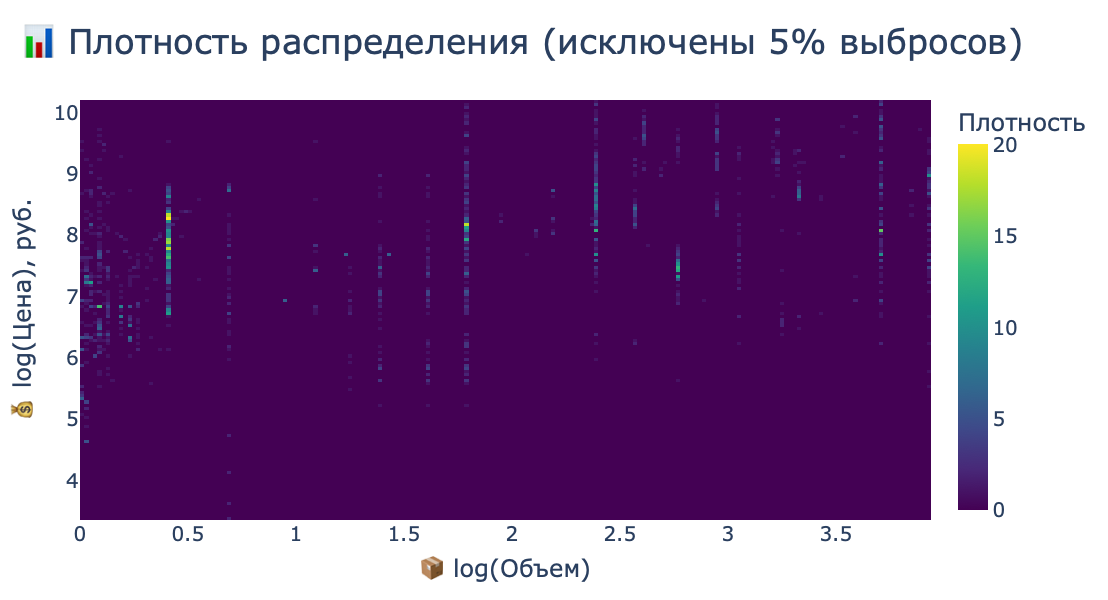

In [21]:
# Фильтруем данные
def remove_extreme_outliers(prices, percentile=95):
    threshold = np.percentile(prices, percentile)
    return prices[prices <= threshold]
    
percentile=95
threshold_price = np.percentile(data['Цена'], percentile)
threshold_volume = np.percentile(data['Объем'], percentile)
filtered_data = data[(data['Цена'] <= threshold_price) & (data['Объем'] <= threshold_volume)].copy()

# Используем ТВОИ эмодзи
categories_list = data['Категория'].unique().tolist()
emoji_list = ['🧪', '🏭', '💄','🛠️', '🔗', '💥']
category_emojis = dict(zip(categories_list, emoji_list))
filtered_data['Категория с эмодзи'] = filtered_data['Категория'].map(category_emojis) + ' ' + filtered_data['Категория']

# Создаем копию данных с логарифмированными значениями
filtered_data_log = filtered_data.copy()
filtered_data_log['log_Объем'] = np.log1p(filtered_data['Объем'])
filtered_data_log['log_Цена'] = np.log1p(filtered_data['Цена'])

# Создаем density heatmap с логарифмированными данными
fig_density = px.density_heatmap(
    filtered_data_log,
    x='log_Объем',
    y='log_Цена',
    title=f'📊 Плотность распределения (исключены {100-percentile}% выбросов)',
    color_continuous_scale='Viridis',
    nbinsx=200,
    nbinsy=200,
)

# Улучшаем внешний вид
fig_density.update_layout(
    xaxis_title="📦 log(Объем)",
    yaxis_title="💰 log(Цена), руб.",
    font=dict(size=20),
    height=600,
    width=1100,
    title_x=0.02,
    title_y=0.95,
    title_font_size=34,
    coloraxis_colorbar=dict(title="Плотность")
)

fig_density.update_traces(
    hovertemplate="log(Объем): %{x:.2f}<br>log(Цена): %{y:.2f}<br>Плотность: %{z} точек<extra></extra>"
)

fig_density.show()

#Сохраняем график в PNG
# fig_density.write_image(
#     FOLDER_PATH + 'graphs/' + f'density_map_price_log_volume_log.png',
#     format="png",
#     width=1100,
#     height=600, 
#     scale=2)

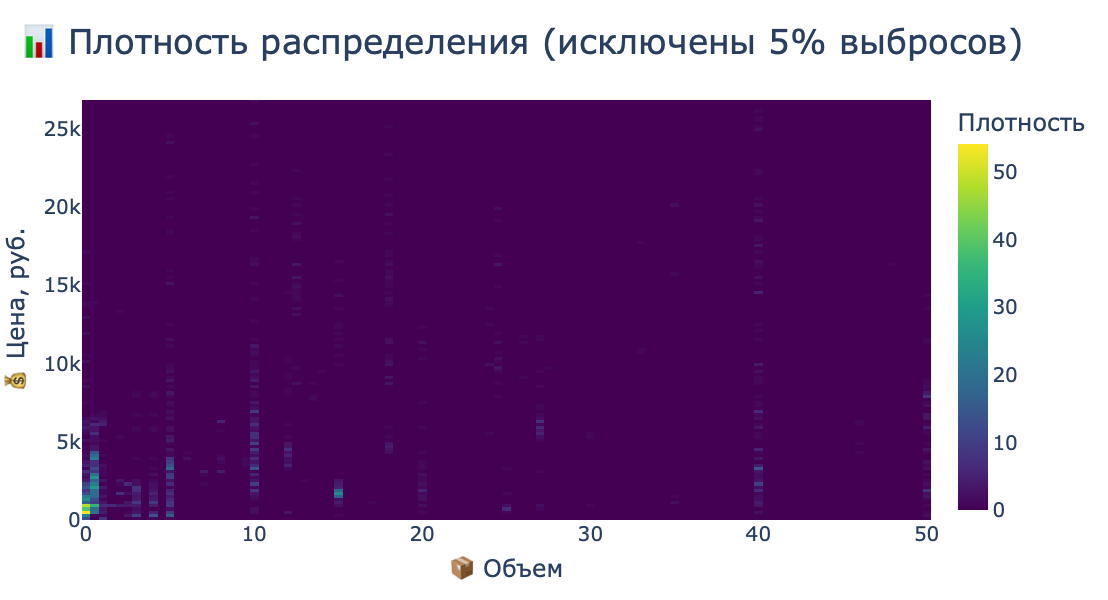

In [22]:
# Фильтруем данные
def remove_extreme_outliers(prices, percentile=95):
    threshold = np.percentile(prices, percentile)
    return prices[prices <= threshold]
    
percentile=95
threshold_price = np.percentile(data['Цена'], percentile)
threshold_volume = np.percentile(data['Объем'], percentile)
filtered_data = data[(data['Цена'] <= threshold_price) & (data['Объем'] <= threshold_volume)].copy()

# Используем ТВОИ эмодзи
categories_list = data['Категория'].unique().tolist()
emoji_list = ['🧪', '🏭', '💄','🛠️', '🔗', '💥']
category_emojis = dict(zip(categories_list, emoji_list))
filtered_data['Категория с эмодзи'] = filtered_data['Категория'].map(category_emojis) + ' ' + filtered_data['Категория']

# Фильтруем данные
def remove_extreme_outliers(prices, percentile=95):
    threshold = np.percentile(prices, percentile)
    return prices[prices <= threshold]
    
percentile=95
threshold_price = np.percentile(data['Цена'], percentile)
threshold_volume = np.percentile(data['Объем'], percentile)
filtered_data = data[(data['Цена'] <= threshold_price) & (data['Объем'] <= threshold_volume)].copy()

# Используем ТВОИ эмодзи
categories_list = data['Категория'].unique().tolist()
emoji_list = ['🧪', '🏭', '💄','🛠️', '🔗', '💥']
category_emojis = dict(zip(categories_list, emoji_list))
filtered_data['Категория с эмодзи'] = filtered_data['Категория'].map(category_emojis) + ' ' + filtered_data['Категория']


# Создаем density heatmap с настройкой бинов
fig_density = px.density_heatmap(
    filtered_data,
    x='Объем',
    y='Цена',
    title=f'📊 Плотность распределения (исключены {100-percentile}% выбросов)',
    color_continuous_scale='Viridis',
    nbinsx=200,  # Количество бинов по X
    nbinsy=200,  # Количество бинов по Y
)

# Улучшаем внешний вид
fig_density.update_layout(
    xaxis_title="📦 Объем",
    yaxis_title="💰 Цена, руб.",
    font=dict(size=20),
    height=600,
    width=1100,
    title_x=0.02,
    title_y=0.95,
    title_font_size=34,
    coloraxis_colorbar=dict(title="Плотность")
)

# Сначала посмотрим на обычных осях
fig_density.update_xaxes(title="📦 Объем")
fig_density.update_yaxes(title="💰 Цена, руб.")

fig_density.update_traces(
    hovertemplate="Объем: %{x:,}<br>Цена: %{y:,} руб.<br>Плотность: %{z} точек<extra></extra>"
)

fig_density.show()

#Сохраняем график в PNG
# fig_density.write_image(
#     FOLDER_PATH + 'graphs/' + f'density_map_price_volume.png',
#     format="png",
#     width=1100,
#     height=600, 
#     scale=2)

In [23]:
data_companies

Модальная категория  \
Компания                                                        
-SUPERNOVA                                          Косметика   
911                                                 Косметика   
A'pich                                              Косметика   
ABAZZILLA                                Газы и газовые смеси   
ALNOVA                                              Косметика   
...                                                       ...   
Югагаз                                   Газы и газовые смеси   
ЯРПОЖИНВЕСТ                Сварочные материалы и оборудование   
Янберг                                   Газы и газовые смеси   
без бренда                               Газы и газовые смеси   
сыворотка для волос Корея                           Косметика   

                           Кол-во товаров модальной категории  \
Компания                                                        
-SUPERNOVA                                                  2   
911                                                         1   
A'pich                                                      1   
ABAZZILLA                                                   2   
ALNOVA                                                      1   
...                                                       ...   
Югагаз                                                     21   
ЯРПОЖИНВЕСТ                                                24   
Янберг                                                      3   
без бренда                                                  3   
сыворотка для волос Корея                                   1   

                           Медианный % скидки  \
Компания                                        
-SUPERNOVA                             17.505   
911                                     9.930   
A'pich                                 16.050   
ABAZZILLA                               2.005   
ALNOVA                                 15.970   
...                                       ...   
Югагаз                                  2.010   
ЯРПОЖИНВЕСТ                             2.010   
Янберг                                  2.010   
без бренда                              2.010   
сыворотка для волос Корея              16.000   

                           Кол-во товара: Газы и газовые смеси  \
Компания                                                         
-SUPERNOVA                                                   0   
911                                                          0   
A'pich                                                       0   
ABAZZILLA                                                    2   
ALNOVA                                                       0   
...                                                        ...   
Югагаз                                                      21   
ЯРПОЖИНВЕСТ                                                 20   
Янберг                                                       3   
без бренда                                                   3   
сыворотка для волос Корея                                    0   

                           Кол-во товара: Герметики  \
Компания                                              
-SUPERNOVA                                        0   
911                                               0   
A'pich                                            0   
ABAZZILLA                                         0   
ALNOVA                                            0   
...                                             ...   
Югагаз                                            0   
ЯРПОЖИНВЕСТ                                       0   
Янберг                                            0   
без бренда                                        0   
сыворотка для волос Корея                         0   

                           Кол-во товара: Клеи и строительные смеси  \
Компания                                                          

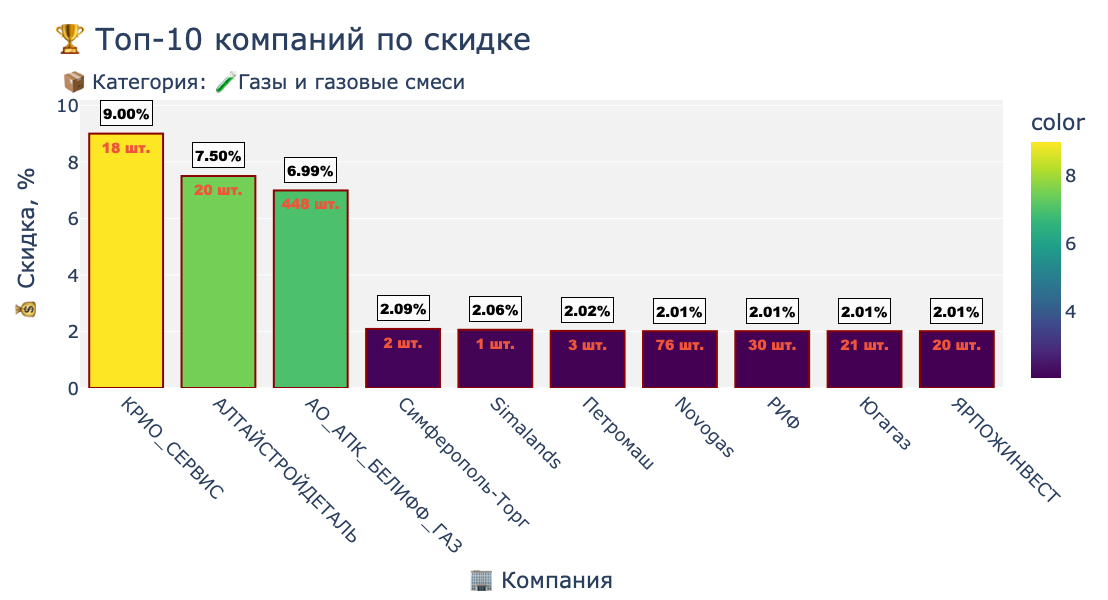

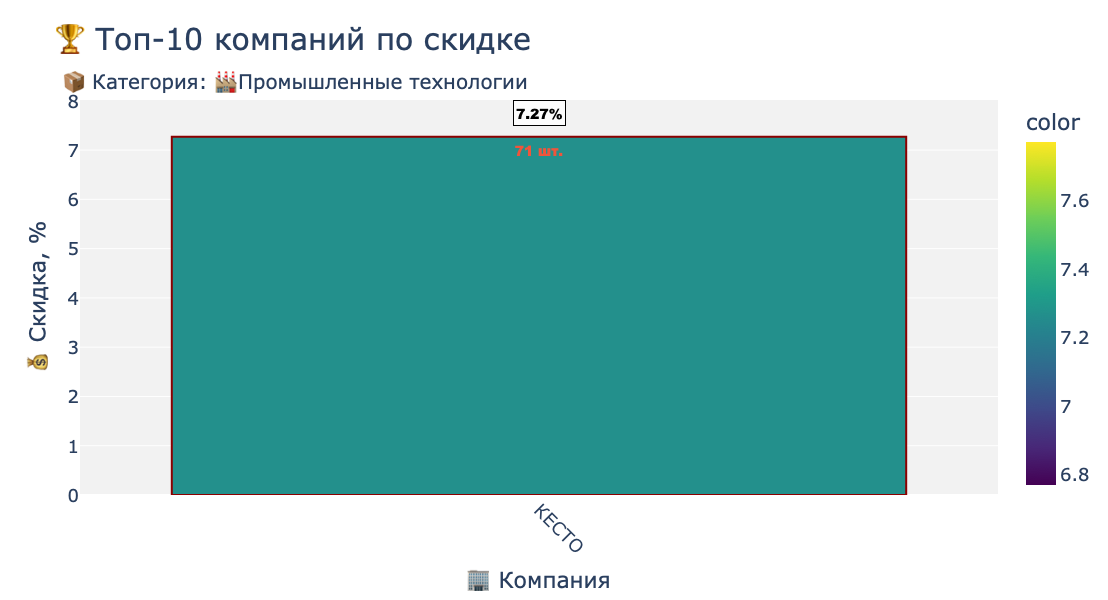

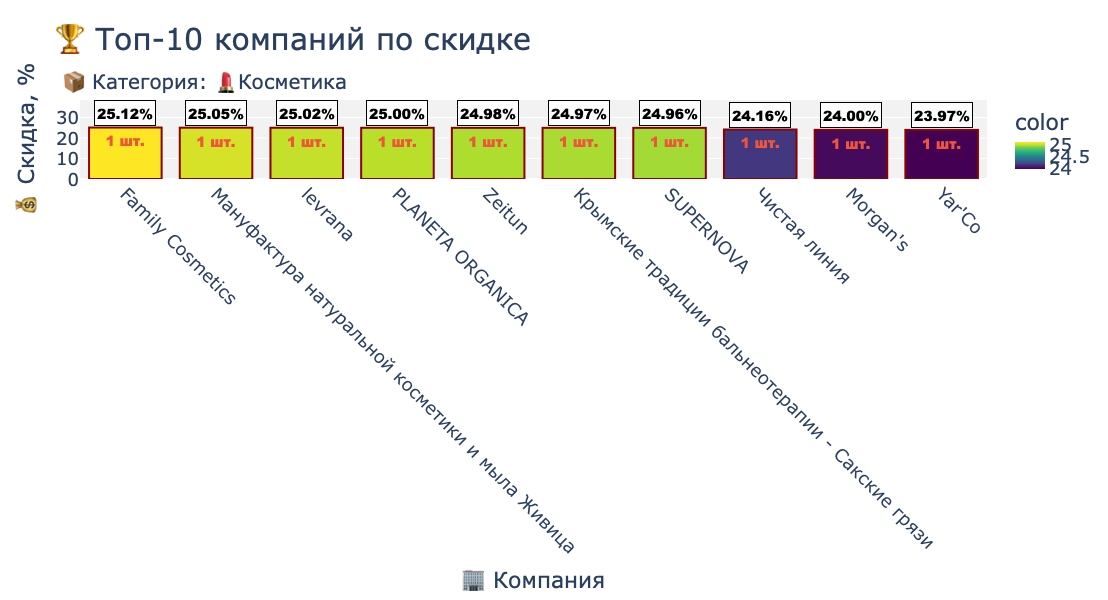

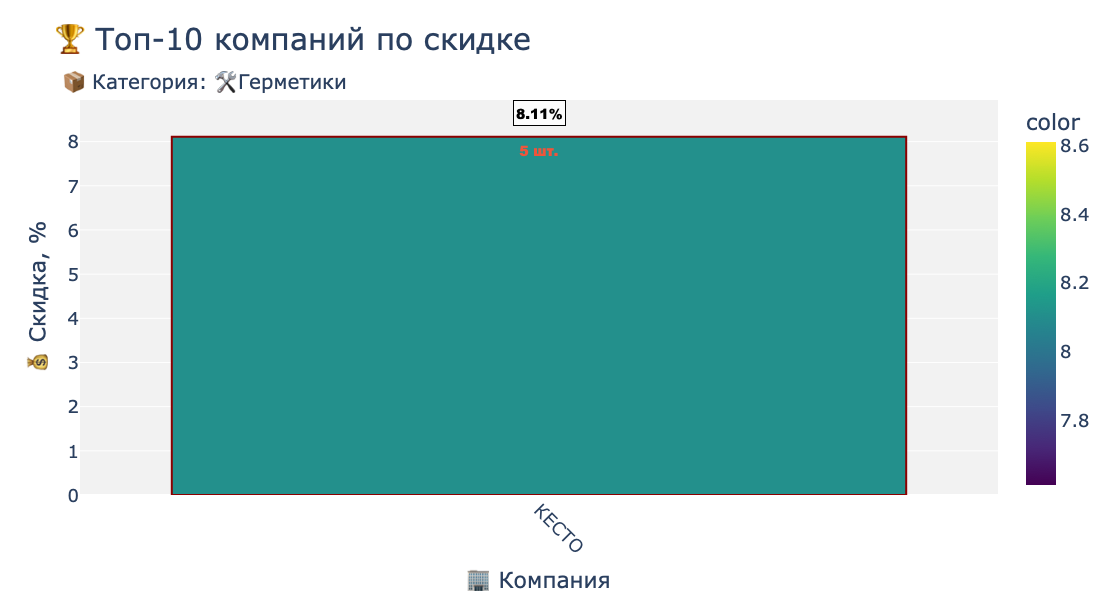

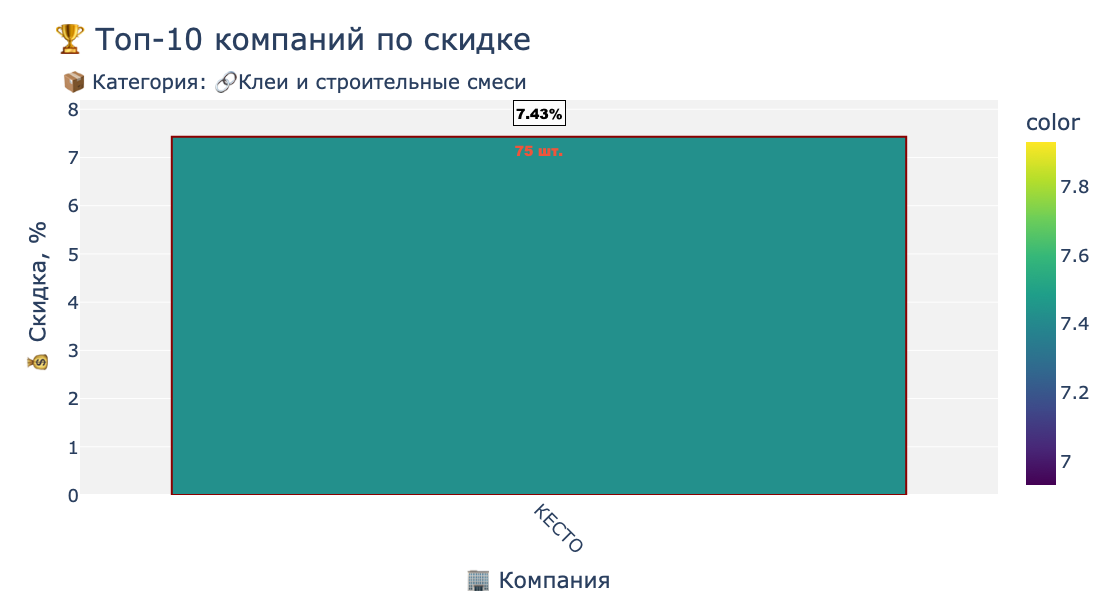

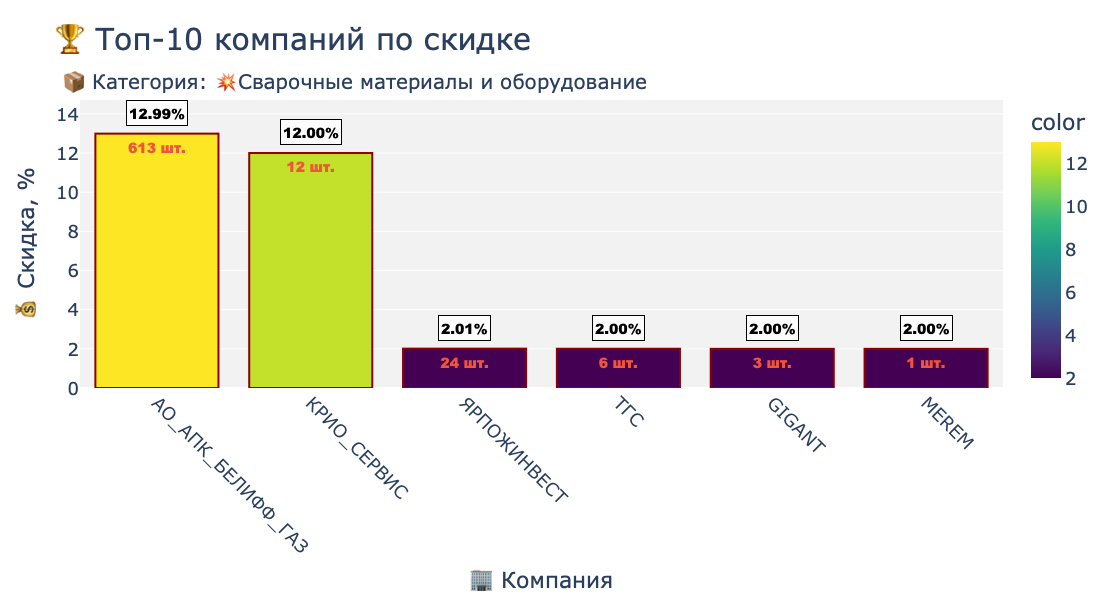

In [24]:
categories_list = data['Категория'].unique().tolist()
emoji_list = ['🧪', '🏭', '💄','🛠️', '🔗', '💥']
category_emojis = dict(zip(categories_list, emoji_list))
n_companies = 10
for category, emoji in category_emojis.items():
    current_emoji = emoji
    current_category = category
    file_category_name = '_'.join(category.split(' '))
    category_name = current_emoji + '' + current_category
    
    discount_category = f'Медианный % скидки: {current_category}'
    current_category_discount = data_companies.loc[~ pd.isna(data_companies[discount_category]),discount_category].sort_values(ascending = False)
    
    amount_category = f'Кол-во товара: {current_category}'
    current_category_amount = data_companies.loc[current_category_discount.index, amount_category]
    
    current_category_discount_and_amount = pd.concat([current_category_discount,
                                                      current_category_amount], axis = 1).sort_values(by = [discount_category, amount_category],
                                                                                                      ascending = [False, False])
    current_category_discount = current_category_discount_and_amount[discount_category][:n_companies]
    current_category_amount = current_category_discount_and_amount[amount_category][:n_companies]
    2
    fig = px.bar(
        current_category_discount,
        title=f'🏆 Топ-{n_companies} компаний по скидке<br><span style="font-size:20px"> 📦 Категория: {category_name}</span>',
        labels={'value': '💰 Медианная скидка, %', 'index': '🏢 Компания'},
        color=current_category_discount.values,
        color_continuous_scale='viridis',  # Красная схема для скидок
        text=current_category_amount,
        category_orders={"index": current_category_discount_and_amount.index.tolist()},
        height=600,
        width=1100,
    )
    
    fig.update_traces(
        texttemplate='%{text} шт.',
        textposition='inside',
        textfont=dict(color='#EF553B', size=14, family="Arial Black"),
        hovertemplate="<b>🏢 %{x}</b><br>💰 Скидка: %{y:.2f}%<br>📦 Товаров: %{text} шт.<extra>🔥</extra>",
        marker=dict(line=dict(color='darkred', width=2))  # Обводка столбцов
    )
    
    fig.update_layout(
        xaxis=dict(tickangle=45),
        plot_bgcolor='rgba(0,0,0,0.05)',
        font=dict(size=18),
        title_x=0.05,
        title_font_size=30,
        annotations=[
            dict(
                x=company,
                y=discount + max(current_category_discount.values) * 0.03,  # Динамический отступ
                text=f'{discount:.2f}%',
                showarrow=False,
                font=dict(size=14, color='black', family="Arial Black"),  # Увеличил размер
                xanchor='center',
                yanchor='bottom',
                bgcolor='rgba(255,255,255,0.8)',  # Легкий белый фон
                bordercolor='black',
                borderwidth=1,
                borderpad=2
            )
            for company, discount in zip(current_category_discount.index, current_category_discount.values)
        ]
    )
    
    
    # Добавляем эмодзи в подписи
    fig.update_xaxes(title="🏢 Компания")
    fig.update_yaxes(title="💰 Скидка, %")
    
    fig.show()
    
    #Сохраняем график в PNG
    # fig.write_image(
    #     FOLDER_PATH + 'graphs/' + f'bar_top_10_companies_by_discount_{file_category_name}.png',
    #     format="png",
    #     width=1100,
    #     height=600, 
    #     scale=2)

Компания
АО_АПК_БЕЛИФФ_ГАЗ    42.672505
КРИО_СЕРВИС          26.013346
АЛТАЙСТРОЙДЕТАЛЬ     22.467992
Novogas               8.704774
HPC Research          6.993015
РИФ                   6.836407
Югагаз                6.119490
ЯРПОЖИНВЕСТ           6.021422
TRILLON               5.545177
SUPREME               5.278115
dtype: float64


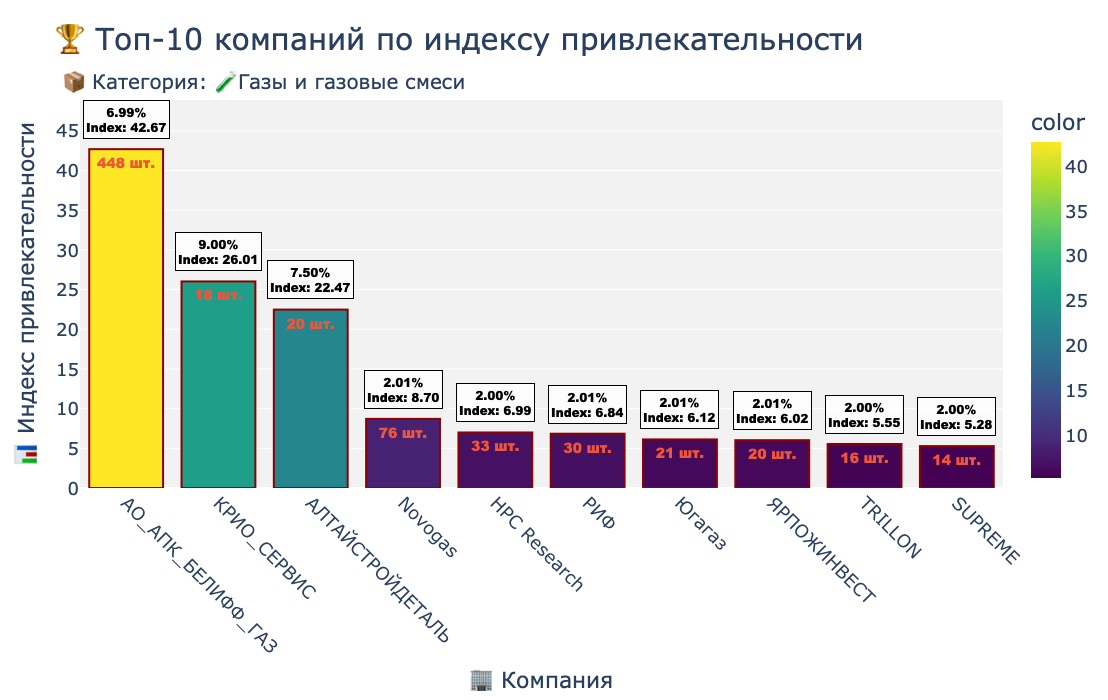

Компания
КЕСТО    30.989683
dtype: float64


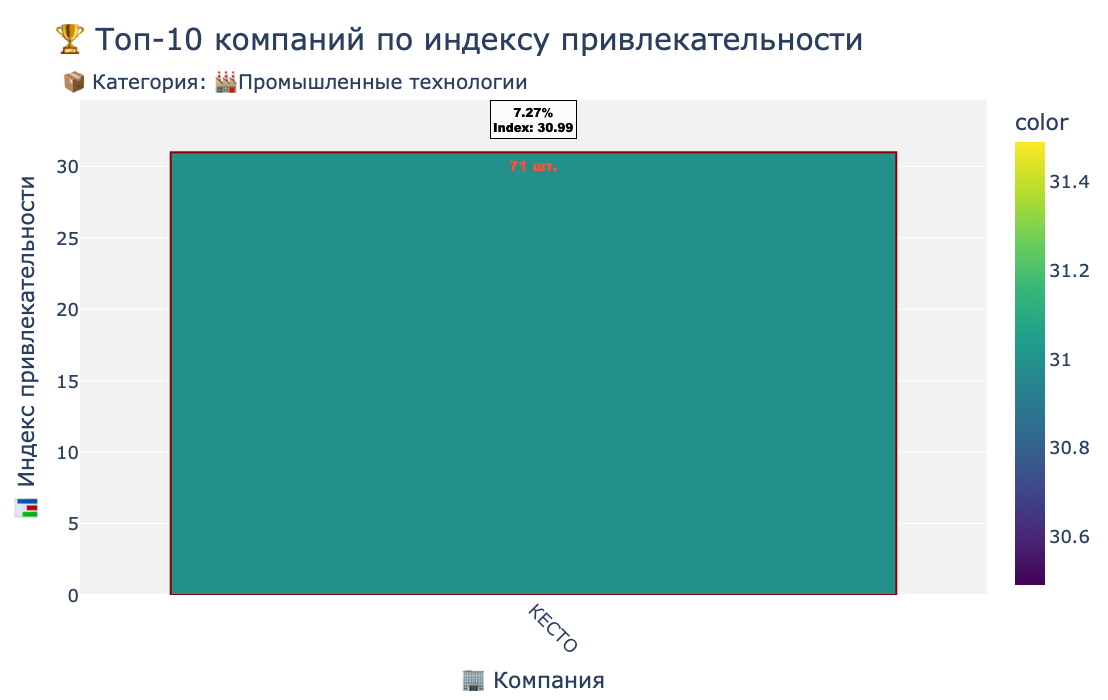

Компания
КРЫМСКАЯ-РОЗА          73.584351
Compliment             48.347515
mirrolla               43.944492
DNC                    28.838369
Cosmokey               27.725887
Sim Sensitive          27.360445
МИРРОЛЛА               24.925573
Likato professional    22.060135
KLEONA                 20.873633
Эксидерм               19.248877
dtype: float64


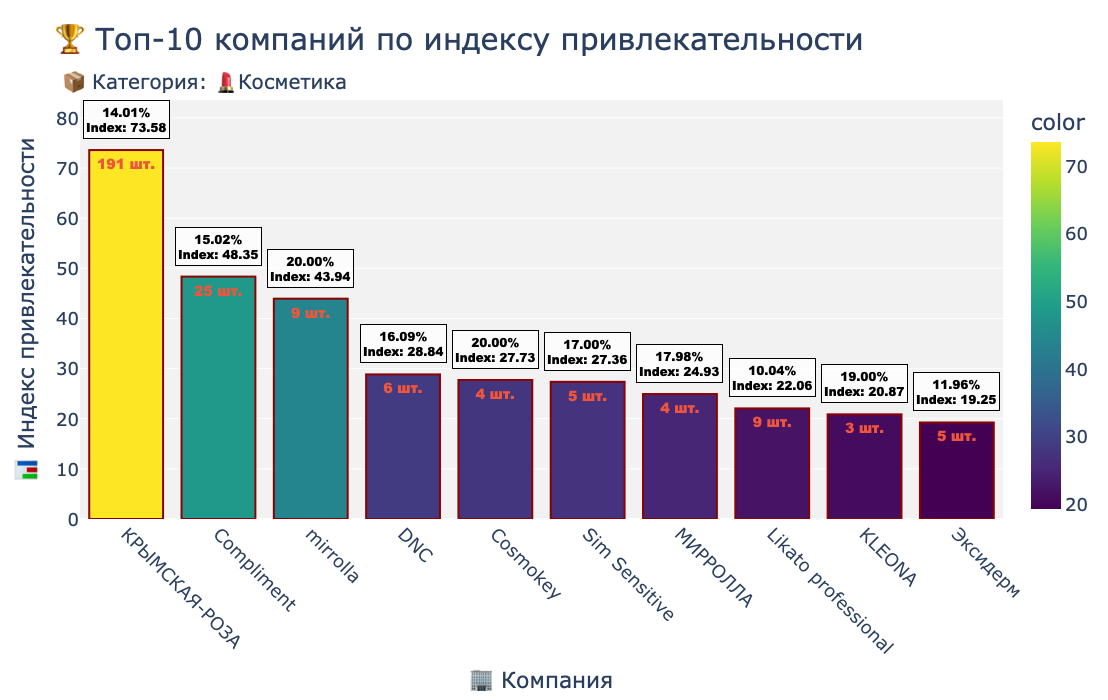

Компания
КЕСТО    13.052541
dtype: float64


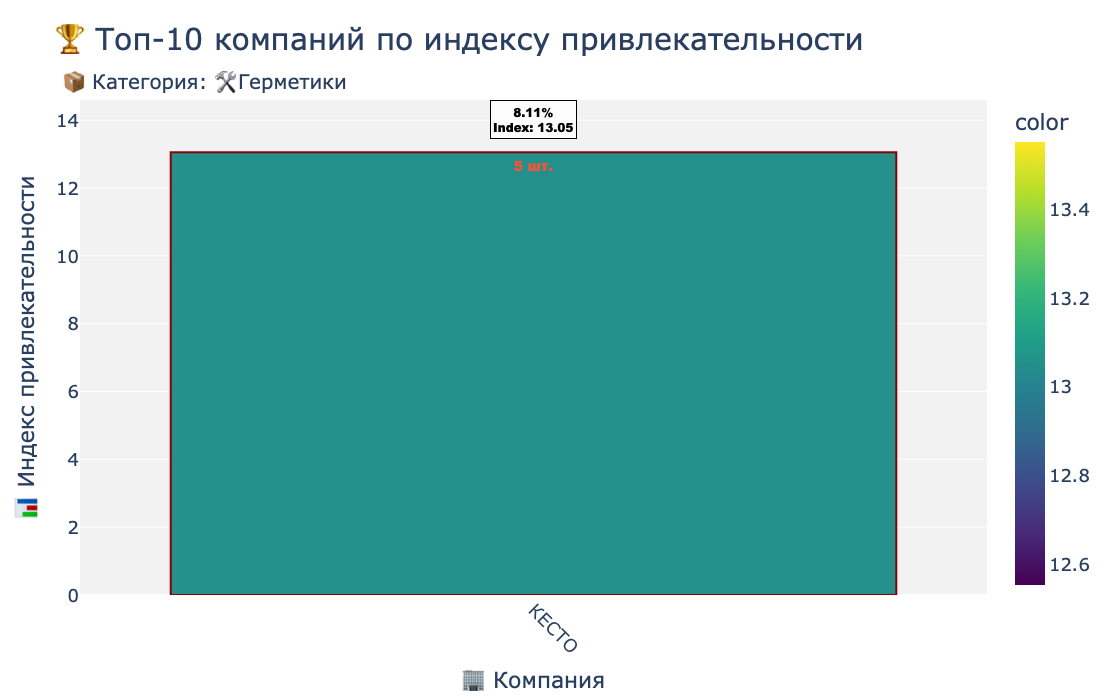

Компания
КЕСТО    32.078937
dtype: float64


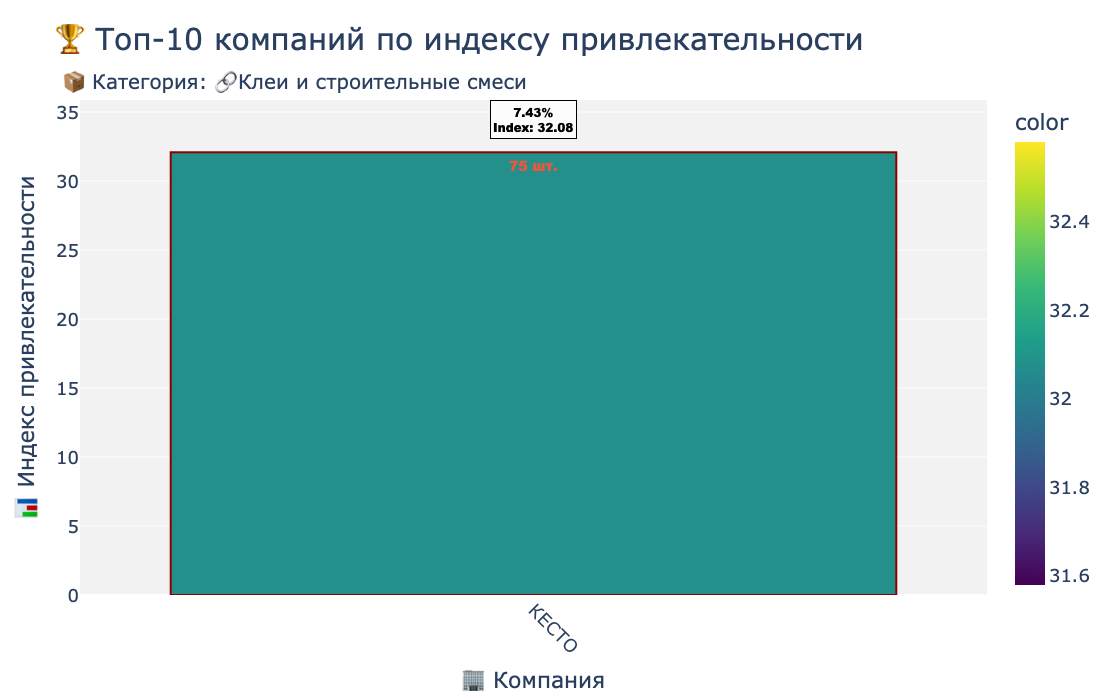

Компания
АО_АПК_БЕЛИФФ_ГАЗ    83.374561
КРИО_СЕРВИС          29.818880
ЯРПОЖИНВЕСТ           6.387888
ТГС                   3.592478
GIGANT                2.197225
MEREM                 0.000000
dtype: float64


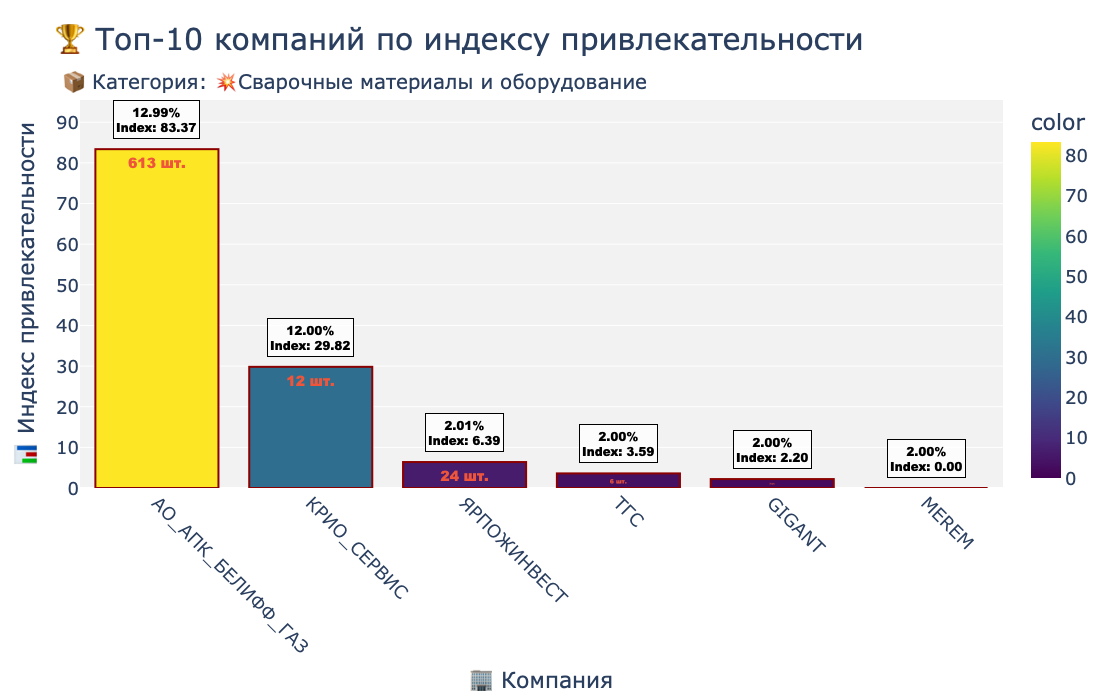

In [53]:
categories_list = data['Категория'].unique().tolist()
emoji_list = ['🧪', '🏭', '💄','🛠️', '🔗', '💥']
category_emojis = dict(zip(categories_list, emoji_list))
n_companies = 10
for category, emoji in category_emojis.items():
    current_emoji = emoji
    current_category = category
    file_category_name = '_'.join(category.split(' '))
    category_name = current_emoji + '' + current_category
    
    discount_category = f'Медианный % скидки: {current_category}'
    current_category_discount = data_companies.loc[~ pd.isna(data_companies[discount_category]),discount_category].sort_values(ascending = False)
    
    amount_category = f'Кол-во товара: {current_category}'
    current_category_amount = data_companies.loc[current_category_discount.index, amount_category]
    
    current_category_scores = current_category_discount * np.log(current_category_amount)
    current_category_scores = current_category_scores.sort_values(ascending = False)[:n_companies]
    current_category_discount = current_category_discount.loc[current_category_scores.index][:n_companies]
    current_category_amount = current_category_amount.loc[current_category_scores.index][:n_companies]
    print(current_category_scores.head(30))
    fig = px.bar(
        current_category_scores,
        title=f'🏆 Топ-{n_companies} компаний по индексу привлекательности<br><span style="font-size:20px"> 📦 Категория: {category_name}</span>',
        labels={'value': '📊 Индекс привлекательности', 'index': '🏢 Компания'},
        color=current_category_scores.values,
        color_continuous_scale='viridis',
        text=current_category_amount,
        category_orders={"index": current_category_scores.index.tolist()},
        height=700,
        width=1100,
    )
    
    fig.update_traces(
        texttemplate='%{text} шт.',
        textposition='inside',
        textfont=dict(color='#EF553B', size=14, family="Arial Black"),
        hovertemplate="<b>🏢 %{x}</b><br>📊 Индекс: %{y:.2f}<br>💰 Скидка: %{customdata[0]:.2f}%<br>📦 Товаров: %{text} шт.<extra>🔥</extra>",
        marker=dict(line=dict(color='darkred', width=2)),
        customdata=np.column_stack([current_category_discount.values])  # Добавляем скидки в hover
    )
    
    fig.update_layout(
        xaxis=dict(tickangle=45),
        plot_bgcolor='rgba(0,0,0,0.05)',
        font=dict(size=18),
        title_x=0.05,
        title_font_size=30,
        annotations=[ # Первая аннотация - процент скидки
            dict(
                x=company,
                y=score + max(current_category_scores.values) * 0.03,
                text=f'{discount:.2f}%<br>Index: {score:.2f}',  # Над баром пишем процент скидки
                showarrow=False,
                font=dict(size=12, color='black', family="Arial Black"),
                xanchor='center',
                yanchor='bottom',
                bgcolor='rgba(255,255,255,0.8)',
                bordercolor='black',
                borderwidth=1,
                borderpad=2
            )
            for company, score, discount in zip(current_category_scores.index, 
                                              current_category_scores.values,
                                              current_category_discount.values)
        ] 
    )
    
    fig.update_xaxes(title="🏢 Компания")
    fig.update_yaxes(title="📊 Индекс привлекательности")
    
    fig.show()

    #Сохраняем график в PNG
    fig.write_image(
        FOLDER_PATH + 'graphs/' + f'bar_top_10_companies_by_profitability_index_{file_category_name}.png',
        format="png",
        width=1100,
        height=700, 
        scale=2)